# Network and Centrality Analysis

To visualize the connection between the pathways that occurred within each cluster, the overlapping genes were utilized to develop pathway networks. With the help of ```GSEAPY``` package, the network in each cluster is generated and consisted of nodes and edges. However, the nodes and edges dataframe can be generated just by using ```pandas```.

Nodes and edges represented the pathways and the overlapping genes between two connected pathways, respectively. The size of the nodes was determined by the ratio of the DEGs and the annotated genes in the database. The thickness of the edges corresponded to the number of genes that overlapped between two connected nodes, which was calculated by Jaccard Similarity as follows:

$$js(A,B) = \frac{A \cap B}{A \cup B}$$

where $A$ and $B$ are the sets of genes of the two connected nodes.

We utilized ```NetworkX``` to calculate degree and betweenness scores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import networkx as nx
import gseapy as gp

In [5]:
from supervenn import supervenn

In [3]:
root_dir = '/Users/anhnguyen/Documents/My_Projects/ST_Data_Analysis/'

In [4]:
significant_pathways = pd.read_csv(root_dir + 'results/enriched_thesis.csv', index_col=0)
significant_pathways.reset_index(drop=True, inplace=True)
significant_pathways

Gene_set  \
0    GO_Biological_Process_2023   
1    GO_Biological_Process_2023   
2    GO_Biological_Process_2023   
3    GO_Biological_Process_2023   
4    GO_Biological_Process_2023   
..                          ...   
929  GO_Molecular_Function_2023   
930  GO_Molecular_Function_2023   
931             KEGG_2019_Mouse   
932             KEGG_2019_Mouse   
933             KEGG_2019_Mouse   

                                                  Term Overlap   P-value  \
0     Regulation Of Epinephrine Secretion (GO:0014060)     1/5  0.001749   
1    Meiotic DNA Double-Strand Break Formation (GO:...     1/6  0.002098   
2    Negative Regulation Of Catecholamine Secretion...     1/6  0.002098   
3    Regulation Of Norepinephrine Secretion (GO:001...     1/6  0.002098   
4            Histone Lysine Demethylation (GO:0070076)     1/7  0.002448   
..                                                 ...     ...       ...   
929   Phosphoric Ester Hydrolase Activity (GO:0042578)    3/52  0.037920   
930  Protein Tyrosine/Serine/Threonine Phosphatase ...    2/23  0.042054   
931             Cytokine-cytokine receptor interaction  13/292  0.000305   
932                             Ether lipid metabolism    3/47  0.029290   
933            Proximal tubule bicarbonate reclamation    2/22  0.038754   

     Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0            0.013218            0                     0  832.875000   
1            0.013218            0                     0  666.266667   
2            0.013218            0                     0  666.266667   
3            0.013218            0                     0  666.266667   
4            0.013218            0                     0  555.194444   
..                ...          ...                   ...         ...   
929          0.499951            0                     0    4.269648   
930          0.499951            0                     0    6.627629   
931          0.047889            0                     0    3.329486   
932          0.980096            0                     0    4.756044   
933          0.980096            0                     0    6.959364   

     Combined Score                                              Genes  \
0       5287.722500                                             ADRA2C   
1       4108.590826                                              SPO11   
2       4108.590826                                             ADRA2C   
3       4108.590826                                             ADRA2C   
4       3338.153583                                                UTY   
..              ...                                                ...   
929       13.971455                                  DUSP5;GDPD3;ENPP6   
930       21.001643                                        DUSP5;DUSP2   
931       26.952553  IL1RN;IL18;CXCR5;CXCL17;PRLR;IL17RB;EDA2R;IL1A...   
932       16.791240                                PLA2G2D;GDPD3;ENPP6   
933       22.621543                                         FXYD2;PCK1   

    Category          filename UP_DW_Regulated  cluster     sample  
0      GO_BP  All_Lungs_0_down            down        0  All_Lungs  
1      GO_BP  All_Lungs_0_down            down        0  All_Lungs  
2      GO_BP  All_Lungs_0_down            down        0  All_Lungs  
3      GO_BP  All_Lungs_0_down            down        0  All_Lungs  
4      GO_BP  All_Lungs_0_down            down        0  All_Lungs  
..       ...               ...             ...      ...        ...  
929    GO_MF    All_Lungs_7_up              up        7  All_Lungs  
930    GO_MF    All_Lungs_7_up              up        7  All_Lungs  
931     KEGG    All_Lungs_7_up              up        7  All_Lungs  
932     KEGG    All_Lungs_7_up              up        7  All_Lungs  
933     KEGG    All_Lungs_7_up              up        7  All_Lungs  

[934 rows x 15 columns]

In [8]:
# create the color map for cluster.
color_code = dict(zip(range(0, 10), plt.cm.tab10(range(0, 10))))

## Overview 

We plot "super venn" diagram to determine the unique down and up-regulated pathways in each cluster.

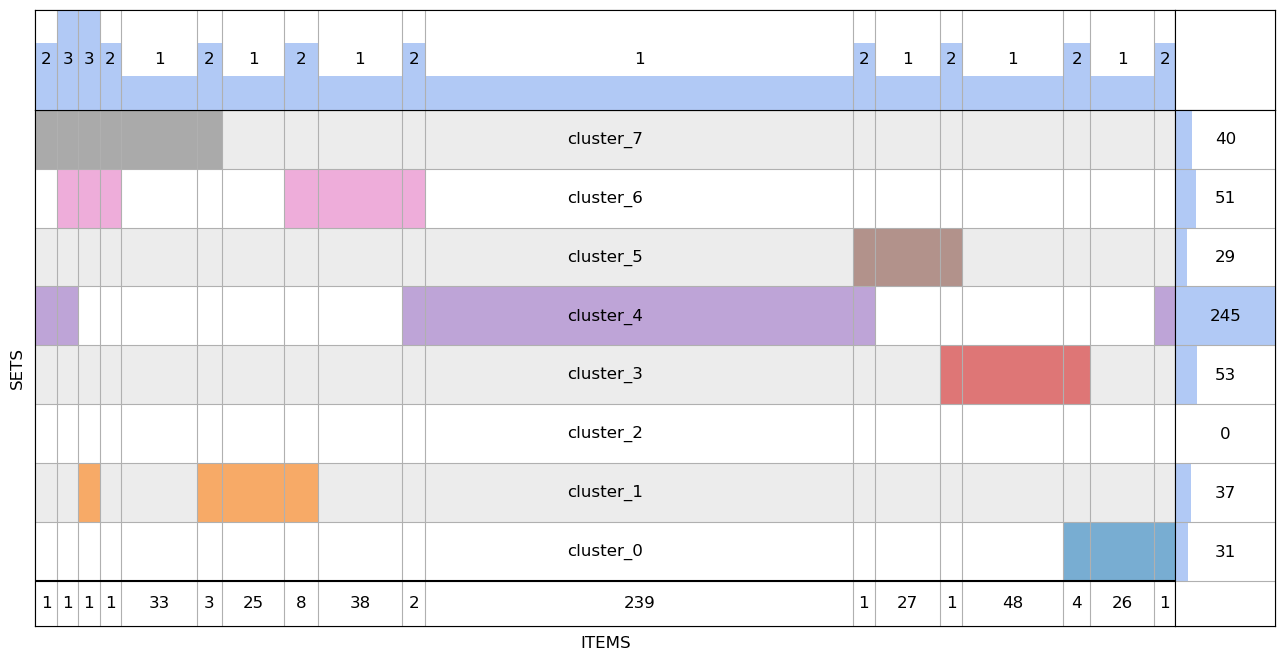

In [6]:
dict_term_down = []
labels = []
for i in range(8):
  sub_pathways = significant_pathways[significant_pathways['cluster'] == i].copy()
  terms_ = sub_pathways[sub_pathways['UP_DW_Regulated'] == 'down']['Term'].tolist()
  if len(terms_) > 0:
    dict_term_down.append({term for term in terms_})
    labels.append('cluster_' + str(i))
  else:
    dict_term_down.append({})
    labels.append('cluster_' + str(i))

plt.figure(figsize=(16, 8))
supervenn(dict_term_down, labels, widths_minmax_ratio=0.05,
          side_plot_color='cornflowerblue')

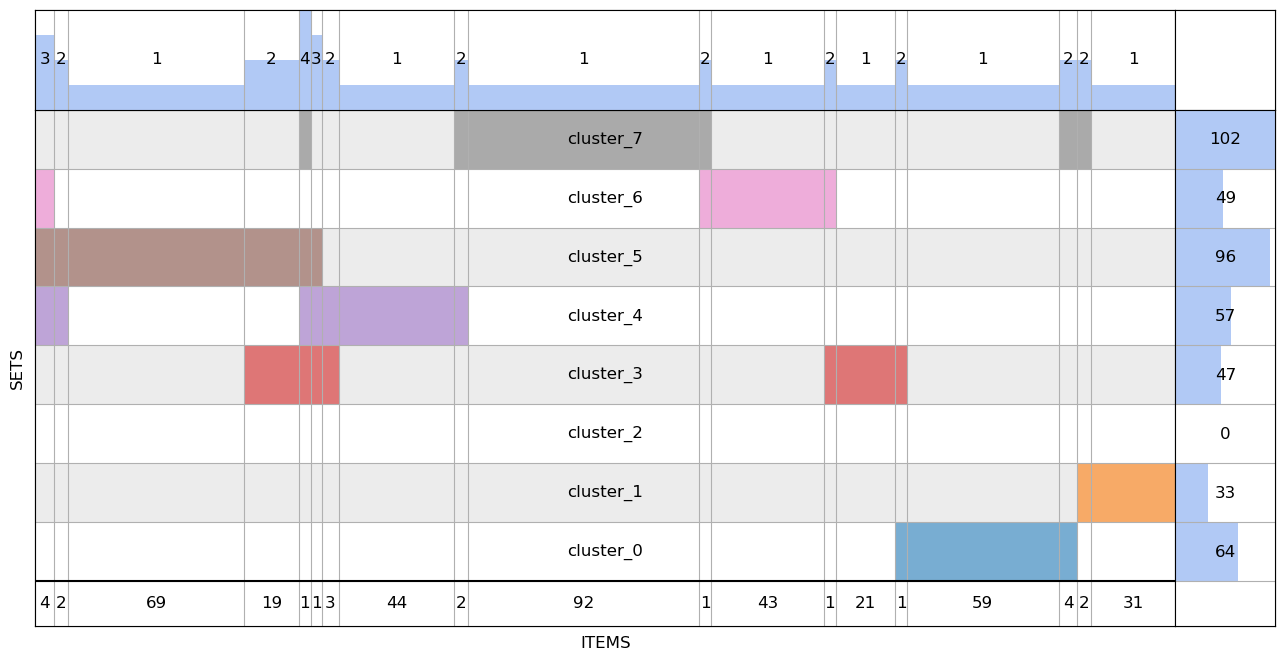

In [7]:
dict_term_up = []
labels = []
for i in range(8):
  sub_pathways = significant_pathways[significant_pathways['cluster'] == i].copy()
  terms_ = sub_pathways[sub_pathways['UP_DW_Regulated'] == 'up']['Term'].tolist()
  if len(terms_) > 0:
    dict_term_up.append({term for term in terms_})
    labels.append('cluster_' + str(i))
  else:
    dict_term_up.append({})
    labels.append('cluster_' + str(i))

plt.figure(figsize=(16, 8))
supervenn(dict_term_up, labels, widths_minmax_ratio=0.05,
          side_plot_color='cornflowerblue')

## Degree Centrality

Degree centrality of a node measures the number of nodes that are directly connected to it:

$$C_d(i) = \sum^n_{j=1} A_{ij}$$

where $i$ is the index of the current node, and $n$ is the number of nodes in the network. If a node is connected to the current node, $A$ is considered as 1. The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph $n − 1$.

Pathways with high degree centrality scores were considered the ones that could cooperate with other pathways to form the key biological functions.

Below, we calculated the degree centrality of network in each cluster and plotted the top 10 pathways with the highest degree centrality score, separated by down and up regulated pathways.

In [25]:
def degree_centratlity(df_pathway, lstCluster = []):
    '''
    This function calculates the degree centrality score and plots the top 10 highest degree centrality score
    pathways in a network. Takes 2 arguments:
    df_pathway : The up or down list of significant pathways
    lstClusters (optional): The list of clusters. If empty, the function will generate plots for all clusters 
    '''
    if len(lstCluster) == 0:
        cats = df_pathway['cluster'].unique().tolist()
    else:
        cats = lstCluster
    
    for i in cats:
        sub_path = df_pathway[df_pathway['cluster'] == i]
        # Use GSEAPY to create nodes and edges dataframe, and P-value < 0.05 as threshold
        # It can be easily generated just by using pandas
        nodes, edges = gp.enrichment_map(sub_path, column='P-value',
                                         top_term=len(sub_path))
        
        # build graph
        G = nx.from_pandas_edgelist(edges,
                                    source='src_idx',
                                    target='targ_idx',
                                    edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])
        # caclulate degree centrality score and select top 10
        degree_ = sorted(dict(G.degree()).items(), key = lambda x : x[1], reverse=True)[:10]

        # generate a sub network consisted of just the top 10 degree score pathways
        top_pathways = []
        for i in degree_:
            if i[1] >= 5:
                top_pathways.append(i[0])
        G_sub = nx.subgraph(G, top_pathways)

        # repeat the process of calculating degree centrality score and select top 10
        # to ensure there is no pathways with no connection in the sub network
        degree_ = sorted(dict(G_sub.degree()).items(), key = lambda x : x[1], reverse=True)[:10]
        top_pathways = []
        for i in degree_:
            if i[1] >= 5:
                top_pathways.append(i[0])
        H = nx.subgraph(G_sub, top_pathways)

        fig, ax = plt.subplots(figsize=(10, 10))

        # init node cooridnates
        pos=nx.layout.spiral_layout(H)

        # draw the nodes, set color based on the cluster, size based on the Hits_ratio
        nx.draw_networkx_nodes(H,
                               pos=pos,
                               node_color=list(nodes.loc[list(H)]['cluster'].map(color_code)),
                               node_size=list(nodes.loc[list(H)]['Hits_ratio'] *1000))
        
        # draw node label, remove the GO term code to shorten the name
        labels = nodes.loc[list(H)]
        labels['new_label'] = np.where(labels['Term'].str.contains('\\(GO'),
                                       labels['Term'].str.split(' \\(').str[0],
                                       labels['Term'])
        nx.draw_networkx_labels(H,
                                pos=pos,
                                labels=labels['new_label'].to_dict(),
                                font_size=12)
        
        # draw edge, edge is calculated by Jaccard Similarity
        edge_weight = nx.get_edge_attributes(H, 'jaccard_coef').values()
        nx.draw_networkx_edges(H,
                               pos=pos,
                               width=list(map(lambda x: x*5, edge_weight)),
                               edge_color='#CDDBD4')
        
        # Adjust the width and height to fit the network and the labels on it
        l,r = plt.xlim()
        d,u = plt.ylim()
        plt.xlim(l-0.4,r+0.4)
        plt.ylim(d-0.4,u+0.4)
        ax.axis('off')
        plt.show()


/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


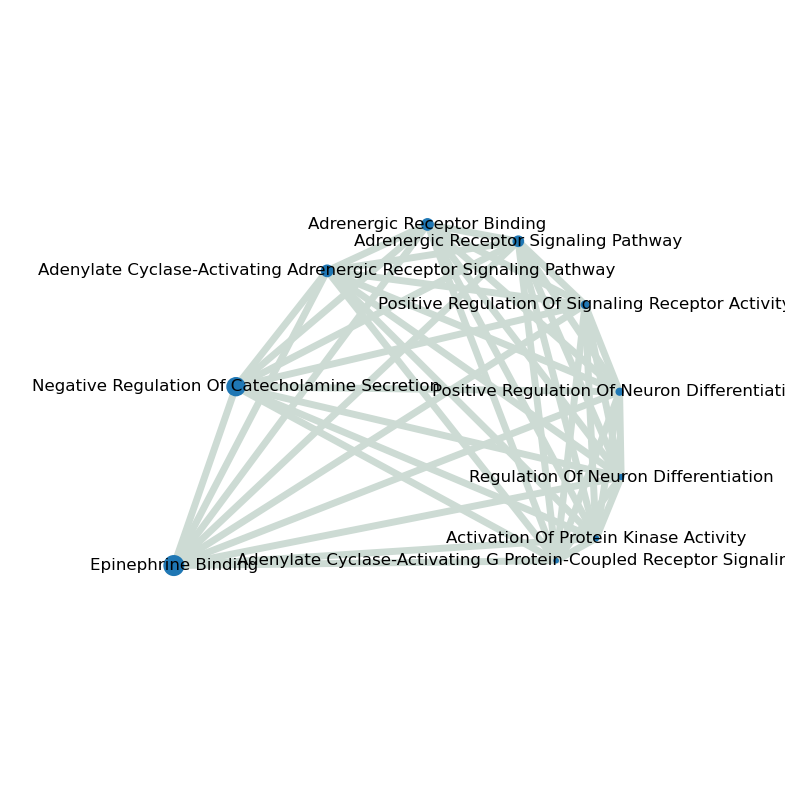

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


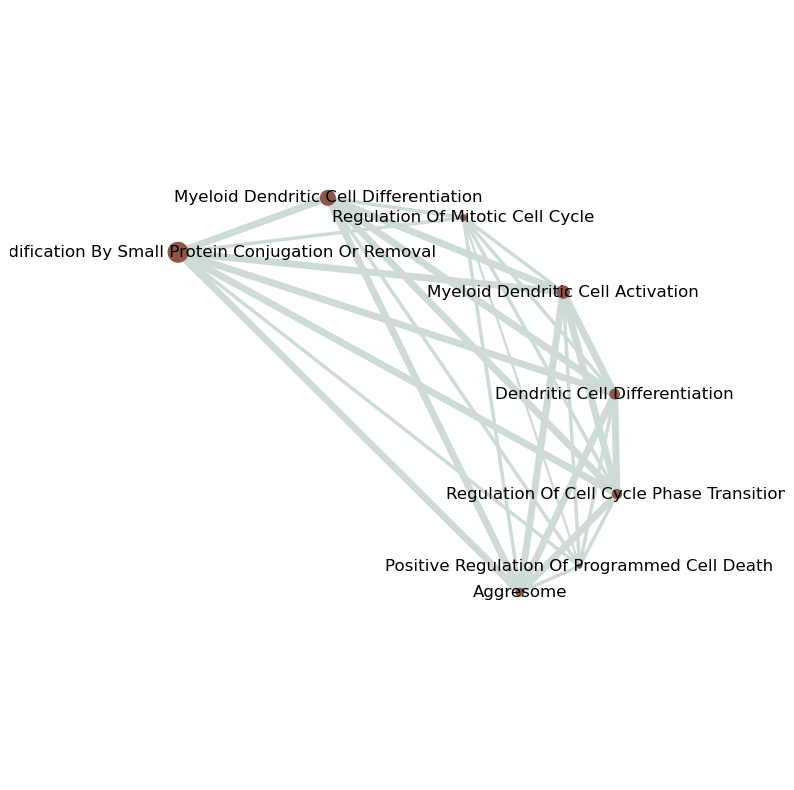

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


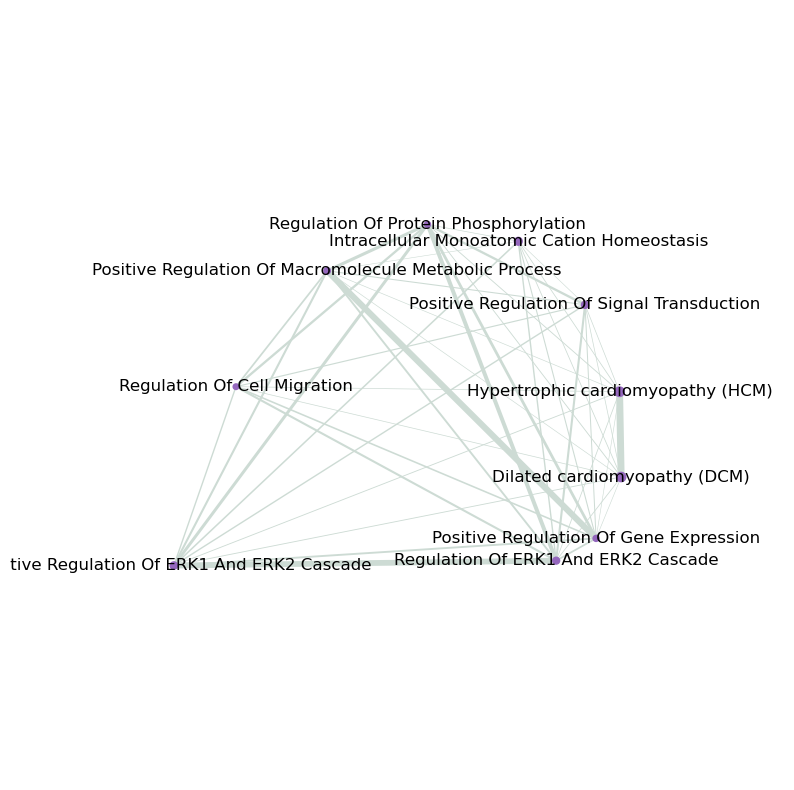

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


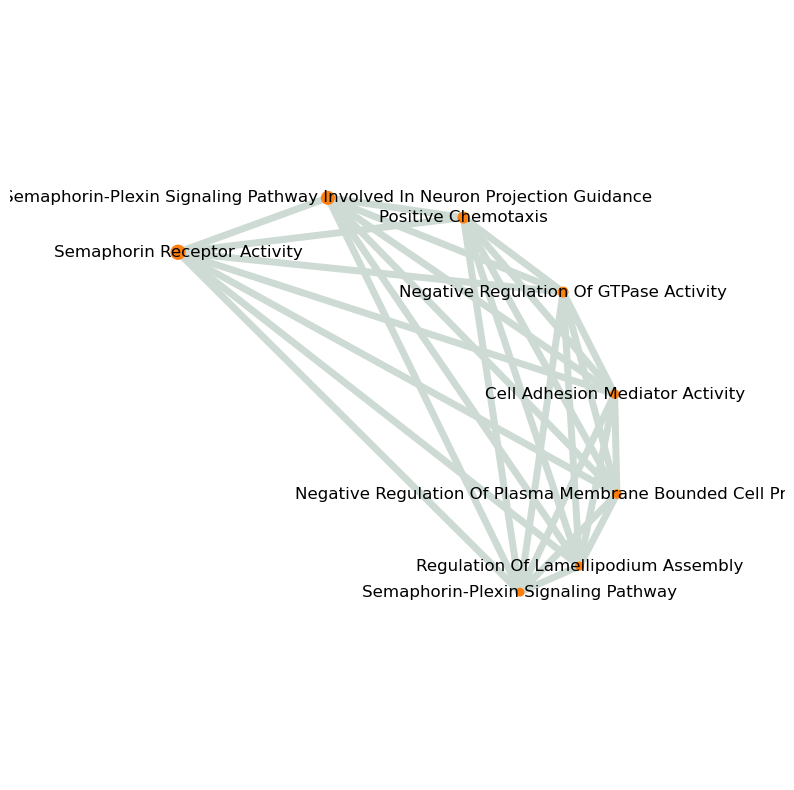

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


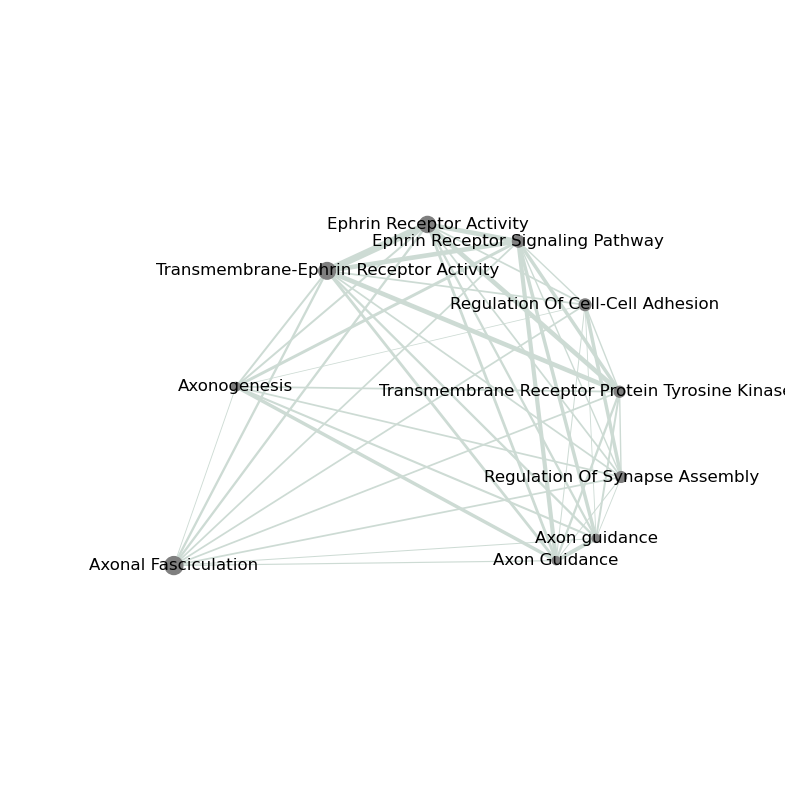

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


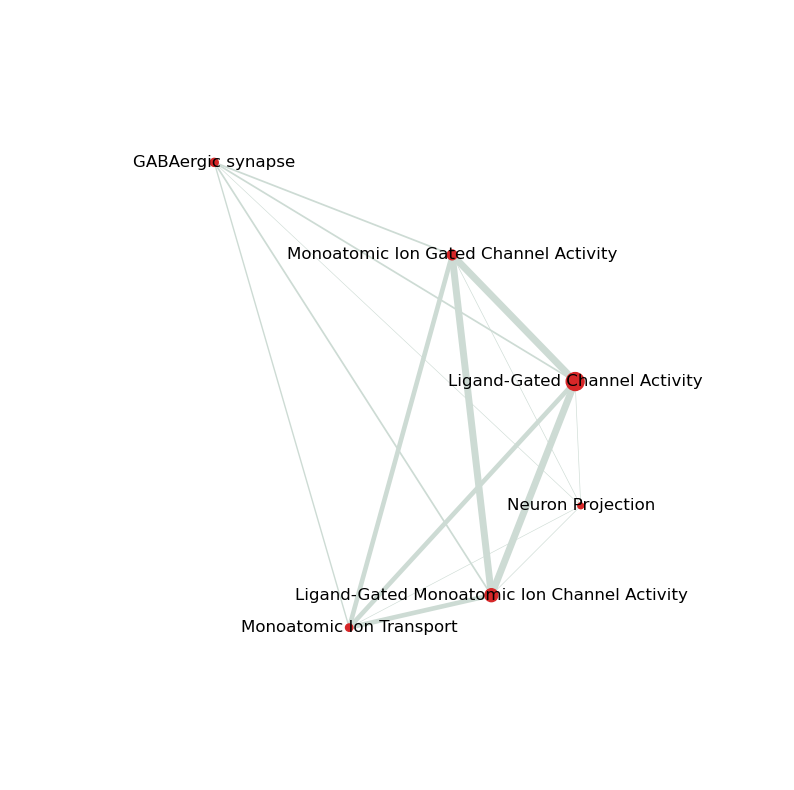

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


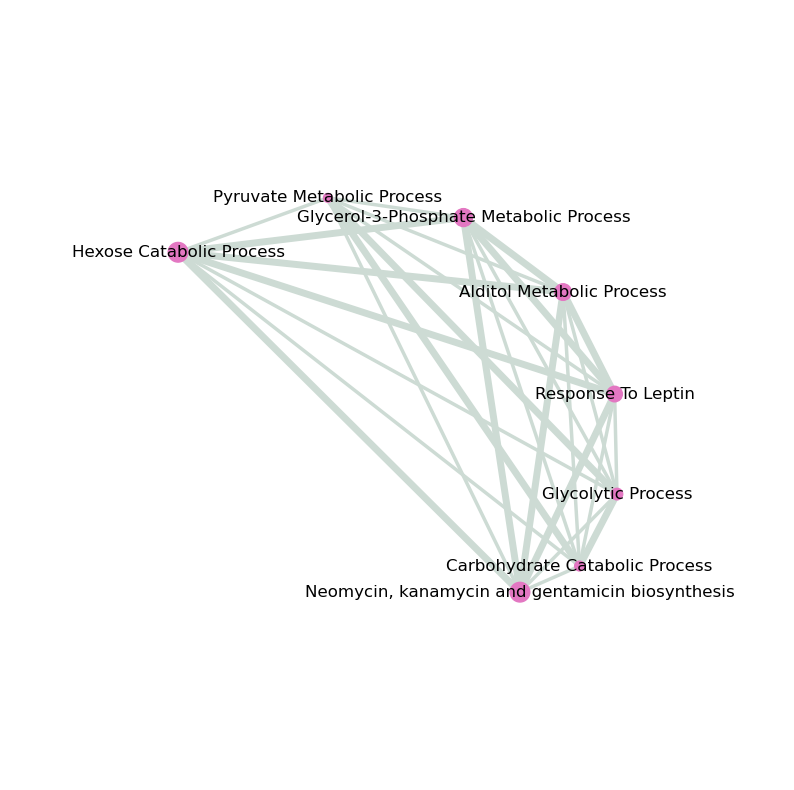

In [26]:
down_path = significant_pathways[significant_pathways['UP_DW_Regulated'] == 'down'].copy()
down_path.drop_duplicates('Term', keep=False, inplace=True)
down_path.sort_values('Combined Score', ascending=False, inplace=True)

degree_centratlity(down_path)

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


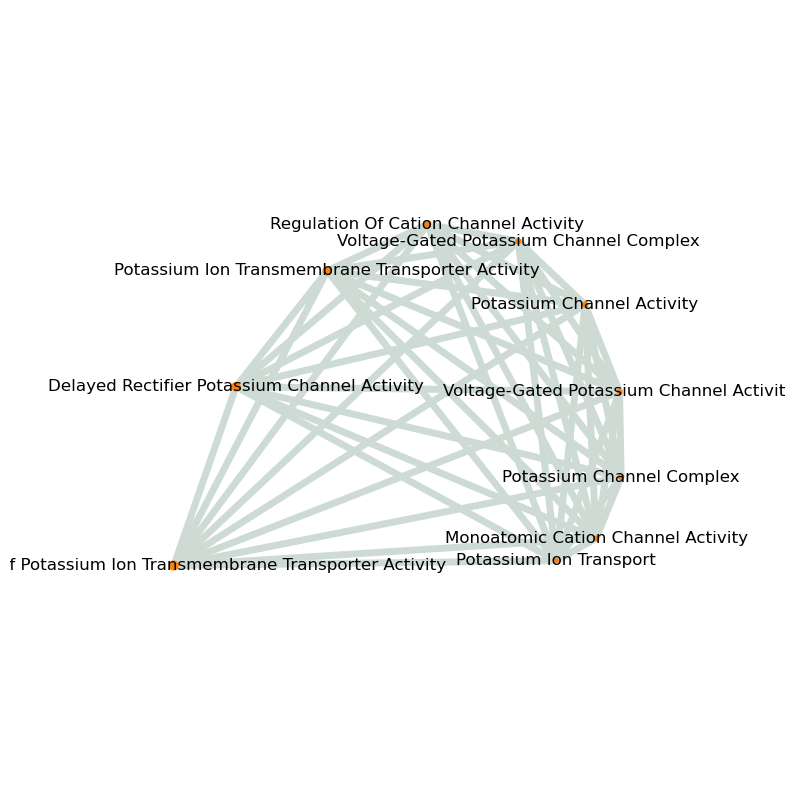

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


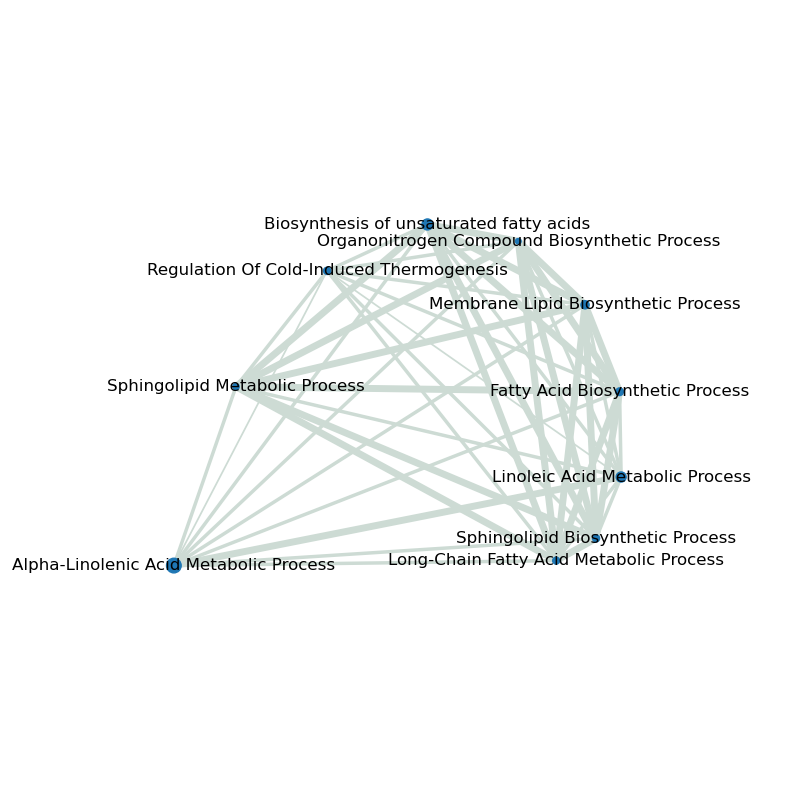

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


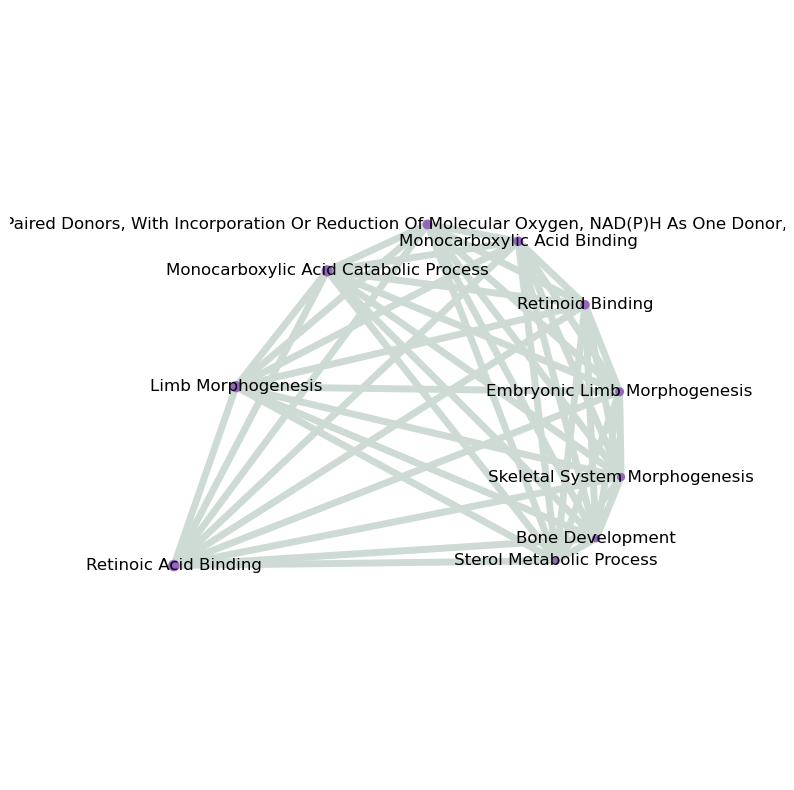

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


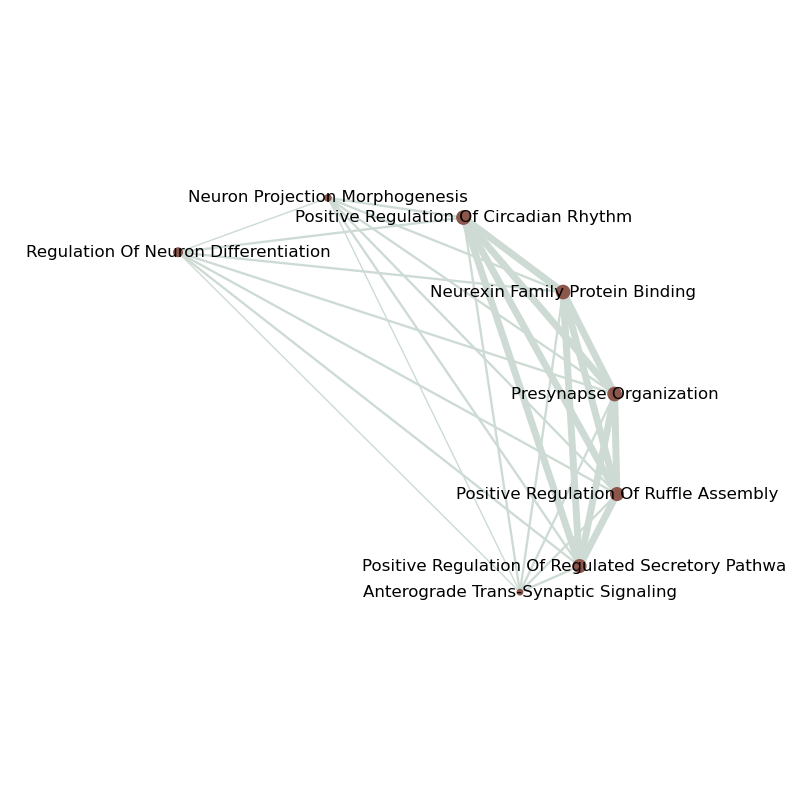

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


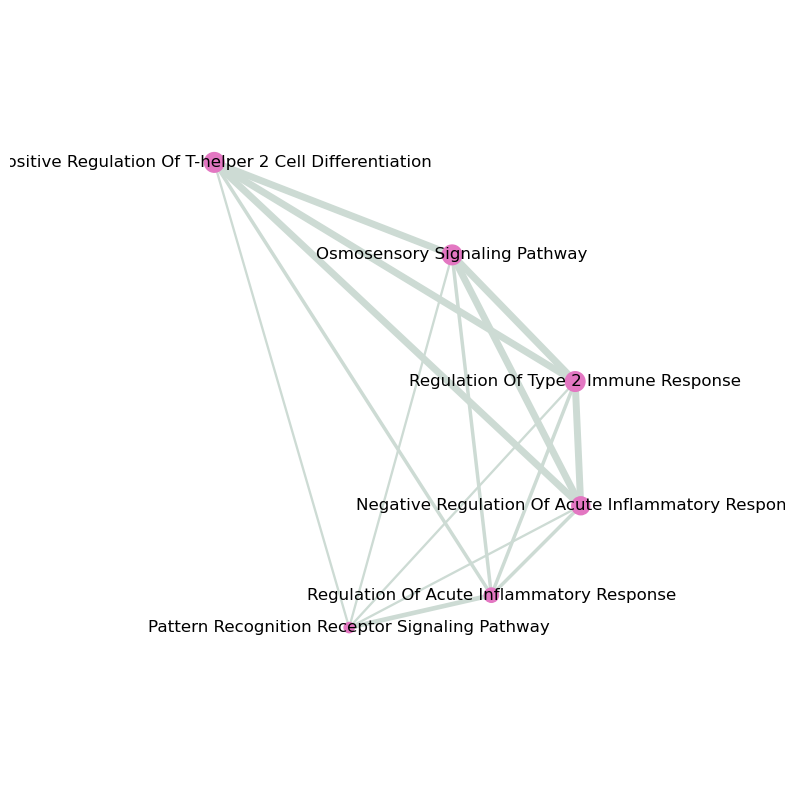

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


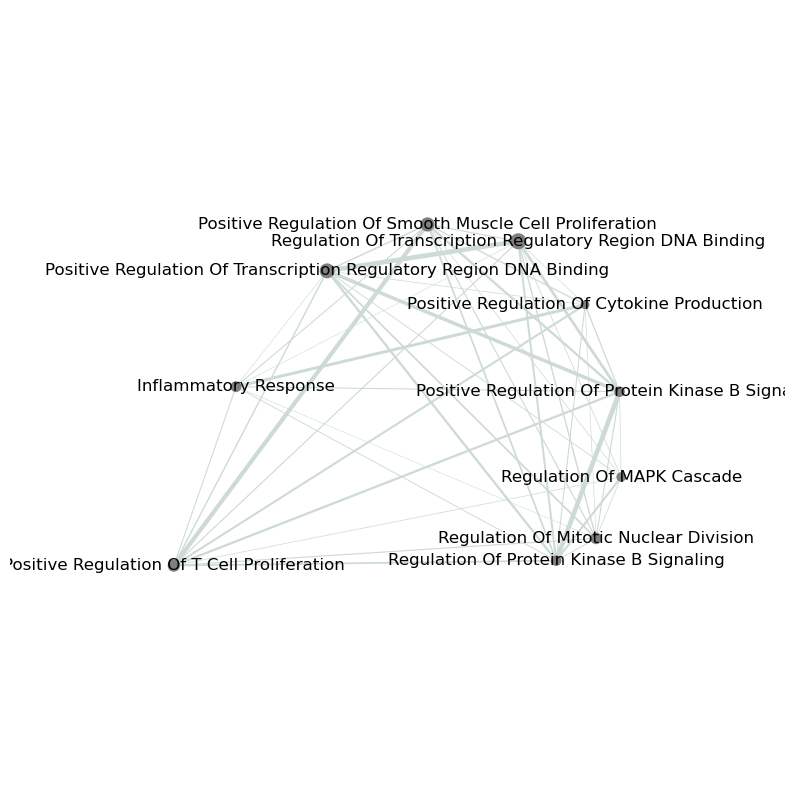

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


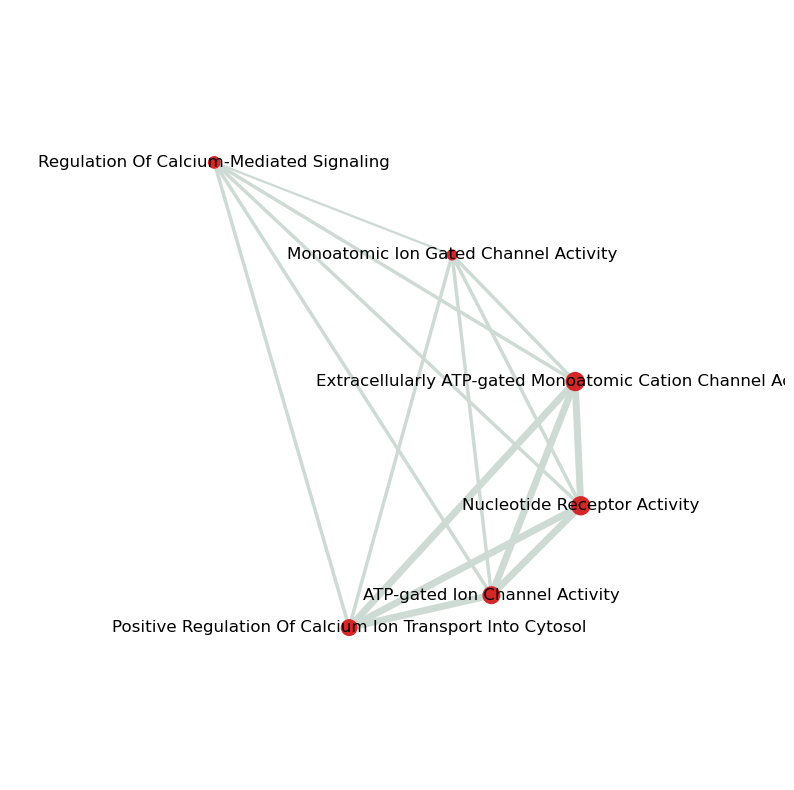

In [28]:
up_path = significant_pathways[significant_pathways['UP_DW_Regulated'] == 'up'].copy()
up_path.drop_duplicates('Term', keep=False, inplace=True)
up_path.sort_values('Combined Score', ascending=False, inplace=True)

degree_centratlity(up_path)

## Betweeness Centrality

The betweenness centrality of a node is the sum of the fraction of all pairs shortest paths that pass through it:

$$C_b(i) = \sum_{s,t \in G} \frac{\sigma(s,t|i)}{\sigma(s,t)}$$

where $G$ is the set of nodes in the network, $\sigma(s,t)$ is the number of shortest paths from node $s$ to node $t$ and $\sigma(s,t|i)$ is the number of those paths passing through node $i$. If $s = t$, $\sigma(s,t) = 1$. If $i \in s,t$, $\sigma(s,t|i) = 0$.

The betweenness centrality measures how often a node is in the shortest path between two other nodes. Pathways with high betweenness centrality scores were considered the gatekeepers of the information, the most influential pathways of the network.

Below we calculate the betweeness centrality of the network in each cluster, combine both and down and up regulated pathways.

In [42]:
from tabulate import tabulate

In [29]:
arrow_UD = dict(zip(['up', 'down'], ['\u2191', '\u2193']))

In [43]:
def betweenness_centrality(df_pathway, lstCluster = []):
    if len(lstCluster) == 0:
        cats = df_pathway['cluster'].unique().tolist()
    else:
        cats = lstCluster

    for i in cats:
        # Use GSEAPY to create nodes and edges dataframe, and P-value < 0.05 as threshold
        # It can be easily generated just by using pandas
        nodes, edges = gp.enrichment_map(df_pathway[df_pathway['cluster'] == i],
                                           column='P-value',
                                           top_term=len(df_pathway.index))
        # build graph
        G = nx.from_pandas_edgelist(edges,
                                    source='src_idx',
                                    target='targ_idx',
                                    edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])
        
        # calculate betweenness centrality and build a dataframe
        bet_centrality = nx.betweenness_centrality(G)
        centrality_scores = [nodes.loc[list(G)]['Term'], bet_centrality,
                             nodes.loc[list(G)]['UP_DW_Regulated'].map(arrow_UD),
                             nodes.loc[list(G)]['Genes']]
        df_centrality = pd.concat([pd.Series(d) for d in centrality_scores], axis=1)
        df_centrality.columns = ['Term', 'Betweenness', 'Up/Down', 'Genes']
        df_centrality = df_centrality.sort_values('Betweenness', ascending=False)
        # only select the pathways with betweenness centrality larger than 0
        df_centrality = df_centrality[df_centrality['Betweenness'] > 0]
        # select the top 20
        lstHighest = df_centrality.head(20).index.tolist()

        fig, ax = plt.subplots(figsize=(20, 20), frameon=False)
        
        # use kamada_kawai_layout layout, it helps observe the hubs
        pos=nx.layout.kamada_kawai_layout(G)

        # create a palette to display the top 20 pathways in firebrick color
        custom_palette = []
        labels = {}
        for i in nodes.loc[list(G)].index.tolist():
            if i in lstHighest:
                custom_palette.append('firebrick')
                labels[i] = i
                print(i, nodes.iloc[i, 1])
            else:
                custom_palette.append('lightskyblue')

        # draw the nodes, color is set by above palette, size is the Hits_ratio
        nx.draw_networkx_nodes(G,
                       pos=pos,
                       node_color=custom_palette,
                       node_size=list(nodes.loc[list(G)]['Hits_ratio'] * 1000))
        
        # draw label, only display the index, we will use the dataframe to show the term of the pathways
        nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=labels)
        
        # draw edge, edge is calculated by Jaccard Similarity
        edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
        nx.draw_networkx_edges(G,
                               pos=pos,
                               width=list(map(lambda x: x*5, edge_weight)),
                               edge_color='#CDDBD4')
        
        plt.grid(False)
        plt.figure()
        plt.show()

        print(tabulate(df_centrality.head(20), headers='keys', tablefmt='psql'))

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


85 Regulation Of Cold-Induced Thermogenesis (GO:0120161)
73 Positive Regulation Of Metabolic Process (GO:0009893)
79 Positive Regulation Of Cold-Induced Thermogenesis (GO:0120162)
21 DNA Binding (GO:0003677)
94 Histone Demethylase Activity (GO:0032452)


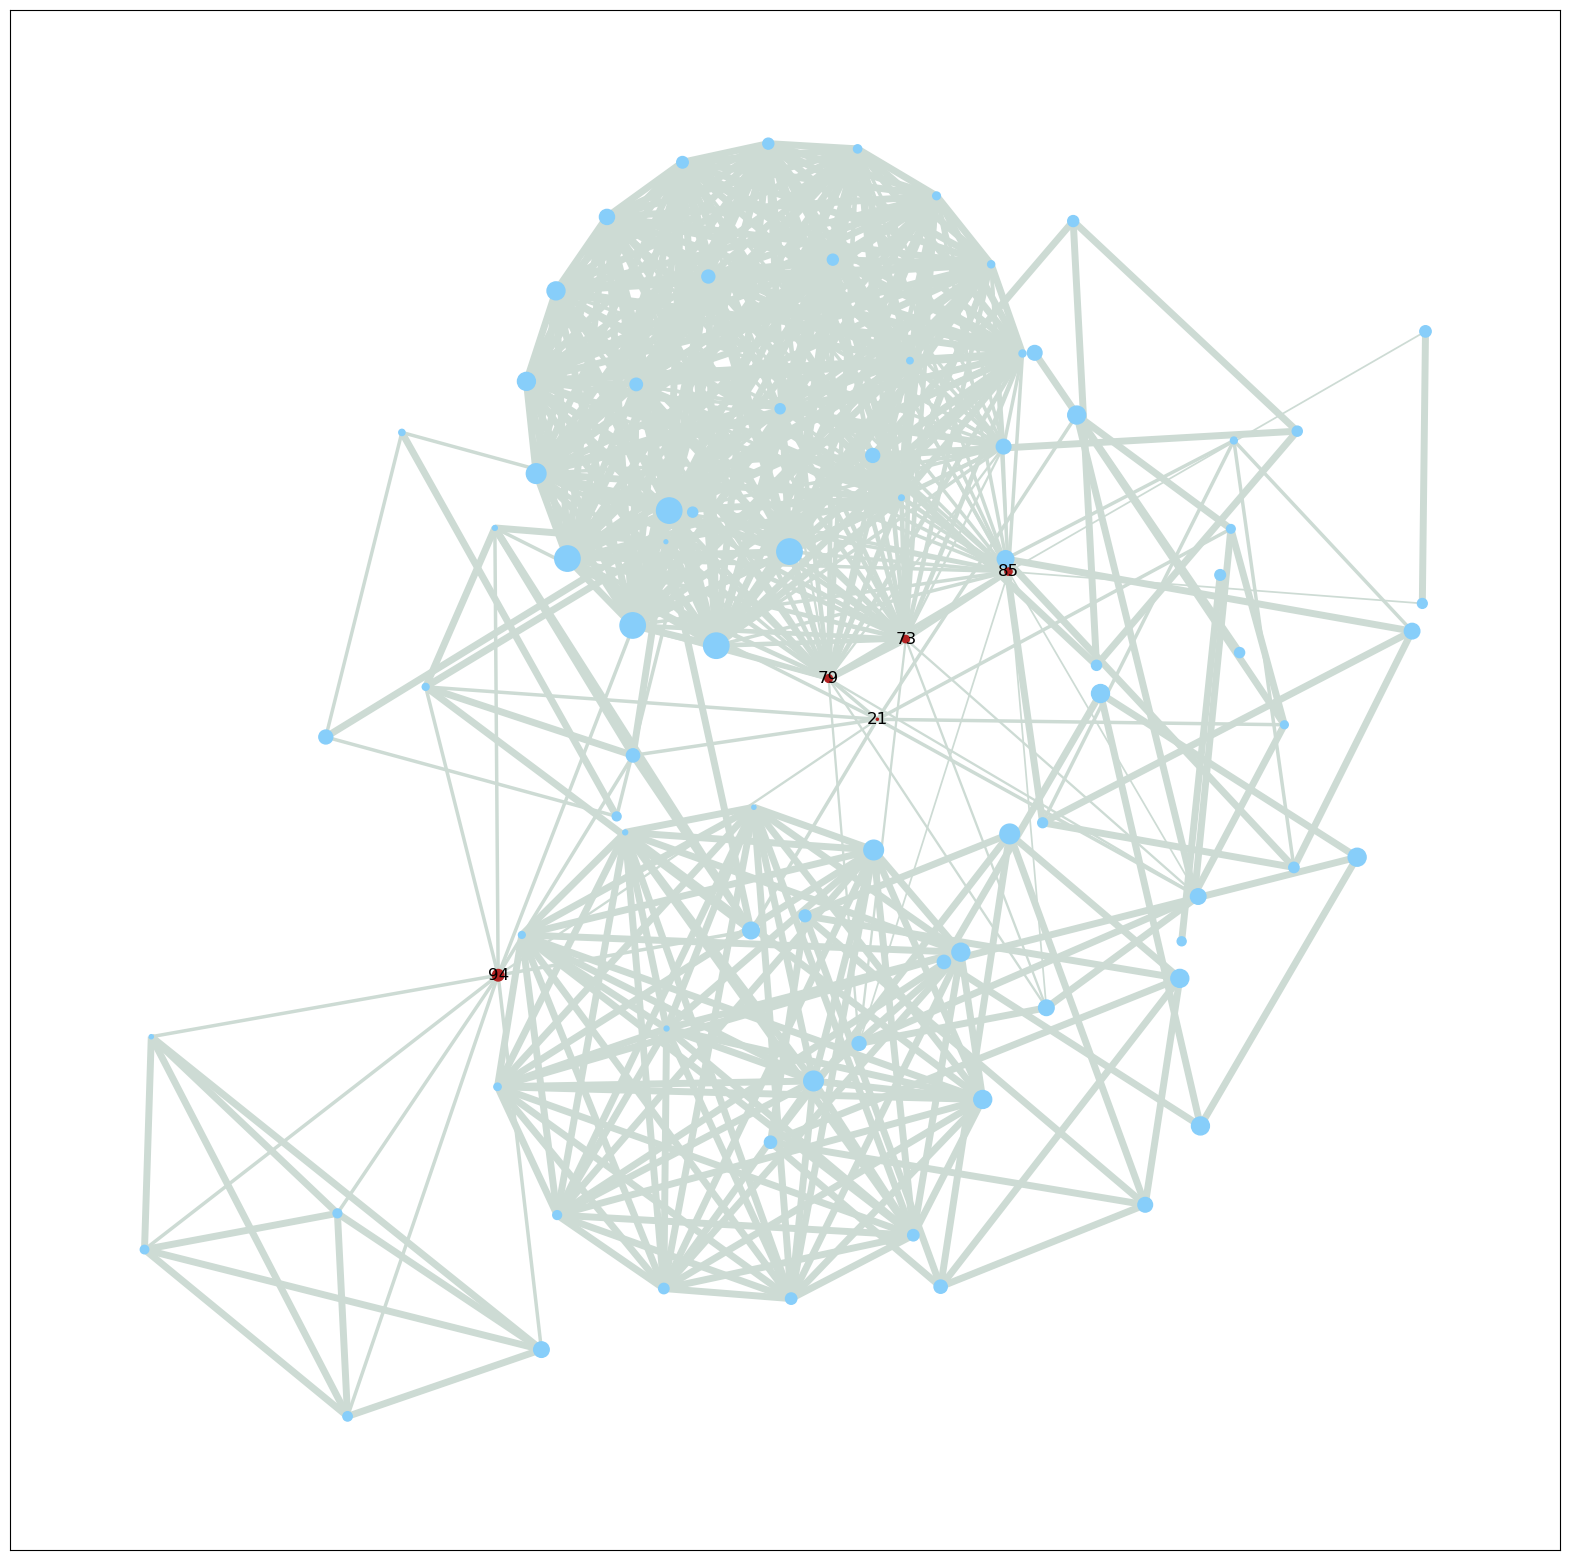

<Figure size 640x480 with 0 Axes>

+----+----------------------------------------------------------------+---------------+-----------+---------------------------+
|    | Term                                                           |   Betweenness | Up/Down   | Genes                     |
|----+----------------------------------------------------------------+---------------+-----------+---------------------------|
| 85 | Regulation Of Cold-Induced Thermogenesis (GO:0120161)          |    0.0212885  | ↑         | ELOVL3;ACOT11;DIO2;ELOVL6 |
| 94 | Histone Demethylase Activity (GO:0032452)                      |    0.0140056  | ↓         | KDM5D;UTY                 |
| 21 | DNA Binding (GO:0003677)                                       |    0.0123249  | ↓         | SPO11;UTY                 |
| 79 | Positive Regulation Of Cold-Induced Thermogenesis (GO:0120162) |    0.00616246 | ↑         | ELOVL3;DIO2;ELOVL6        |
| 73 | Positive Regulation Of Metabolic Process (GO:0009893)          |    0.00616246 | ↑         | ELOV

In [44]:
betweenness_centrality(significant_pathways, [0])

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


34 Regulation Of Neuron Projection Development (GO:0010975)
69 Regulation Of Axonogenesis (GO:0050770)


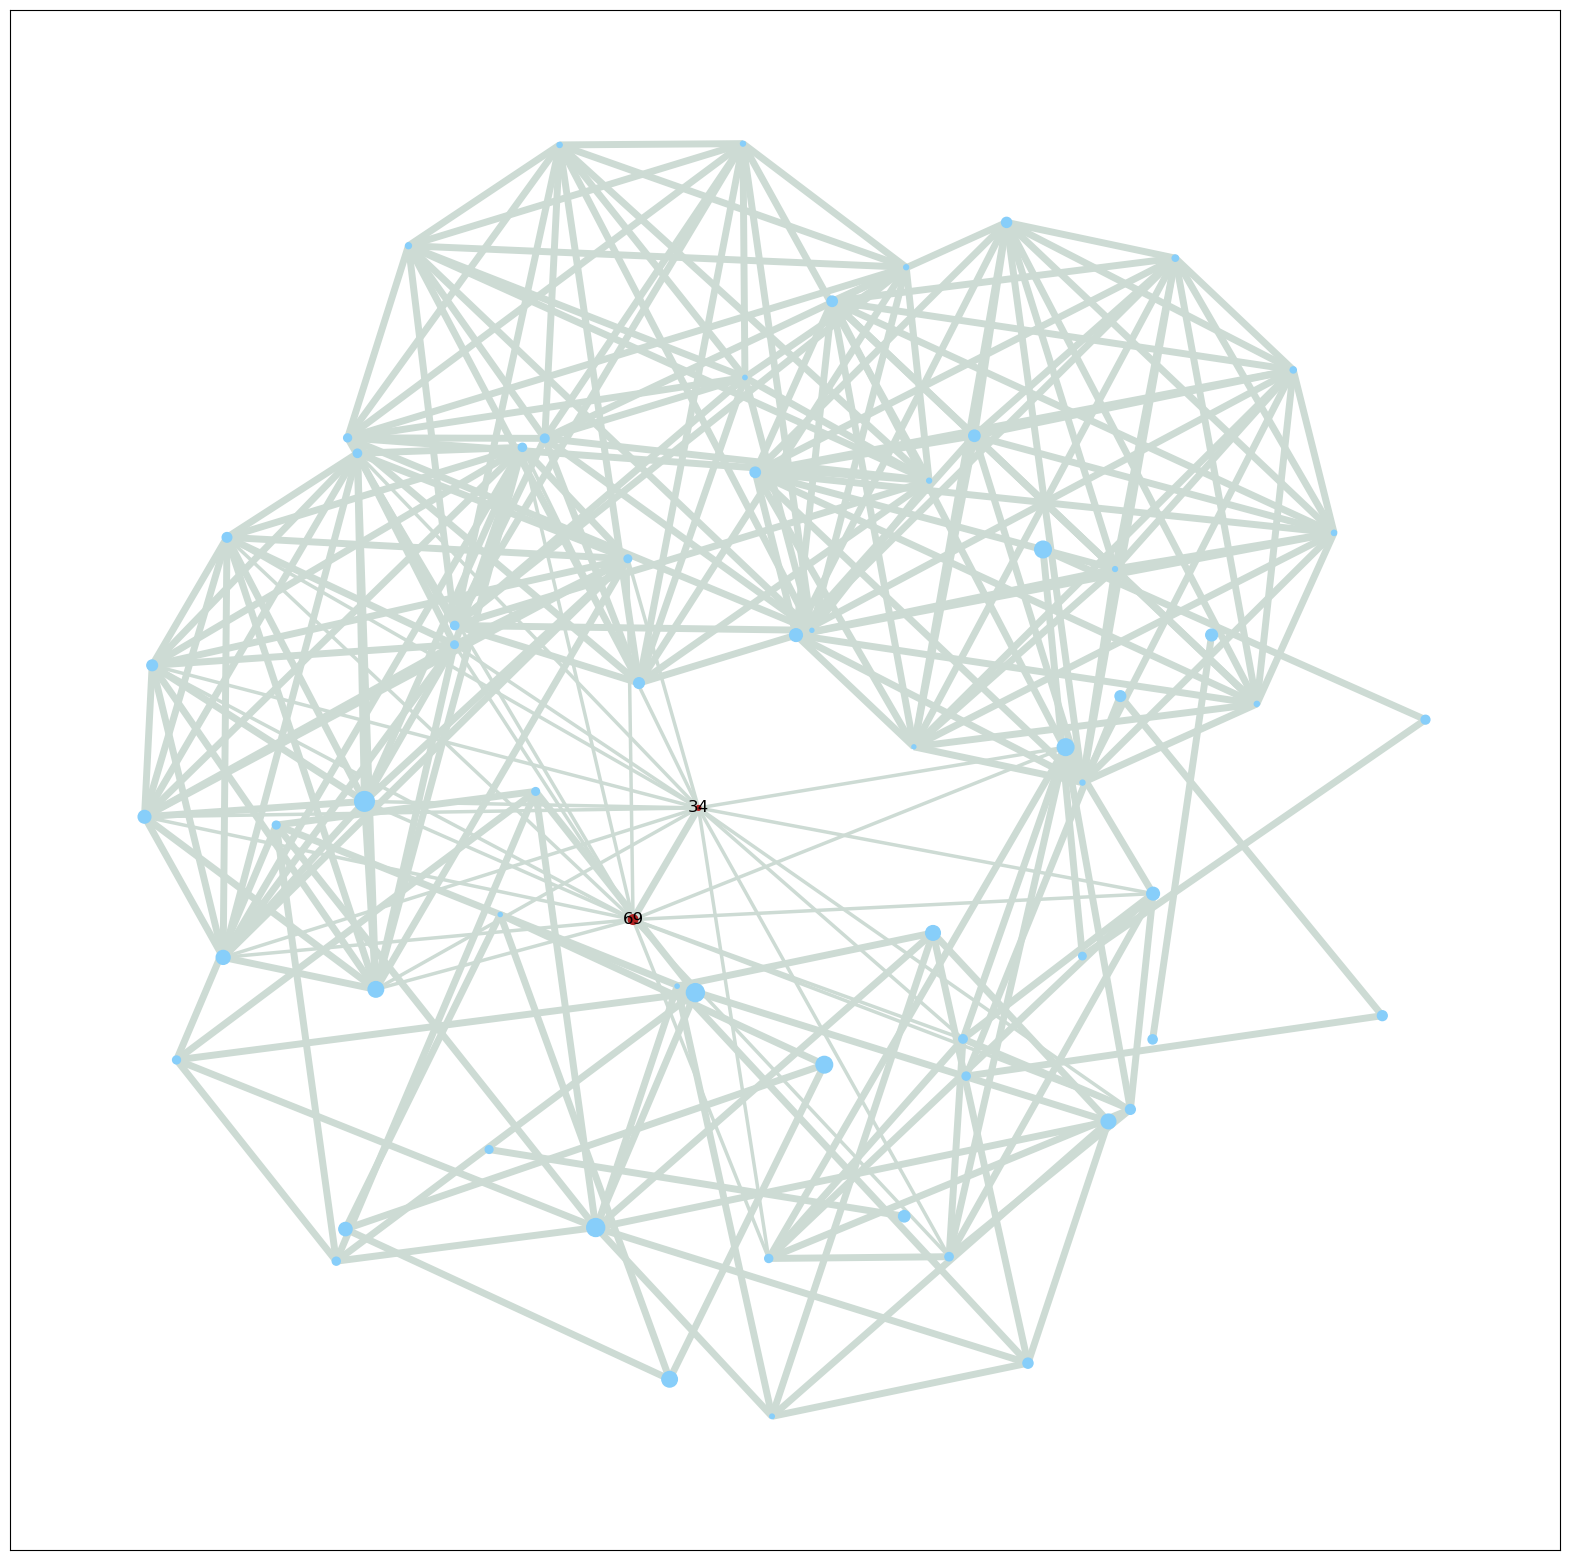

<Figure size 640x480 with 0 Axes>

+----+----------------------------------------------------------+---------------+-----------+--------------+
|    | Term                                                     |   Betweenness | Up/Down   | Genes        |
|----+----------------------------------------------------------+---------------+-----------+--------------|
| 34 | Regulation Of Neuron Projection Development (GO:0010975) |      0.013986 | ↓         | BRSK2;PLXNB3 |
| 69 | Regulation Of Axonogenesis (GO:0050770)                  |      0.013986 | ↓         | BRSK2;PLXNB3 |
+----+----------------------------------------------------------+---------------+-----------+--------------+


In [45]:
betweenness_centrality(significant_pathways, [1])

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


0 Monoatomic Ion Transport (GO:0006811)
46 Monoatomic Ion Gated Channel Activity (GO:0022839)
63 GABAergic synapse
85 Ligand-Gated Monoatomic Ion Channel Activity (GO:0015276)
89 Neuron Projection (GO:0043005)
95 Ligand-Gated Channel Activity (GO:0022834)
74 Regulation Of Axonogenesis (GO:0050770)
78 Tau Protein Binding (GO:0048156)
94 Tau-Protein Kinase Activity (GO:0050321)
61 Regulation Of Neurotransmitter Secretion (GO:0046928)
82 Negative Regulation Of Catalytic Activity (GO:0043086)
83 Amphetamine addiction
86 Regulation Of Secretion By Cell (GO:1903530)
91 Kinetochore Microtubule (GO:0005828)
76 Voltage-Gated Potassium Channel Activity (GO:0005249)
98 Delayed Rectifier Potassium Channel Activity (GO:0005251)
29 Protein Complex Oligomerization (GO:0051259)
90 Hydrolase Activity, Acting On Carbon-Nitrogen (But Not Peptide) Bonds, In Linear Amides (GO:0016811)
80 Regulation Of Androgen Receptor Signaling Pathway (GO:0060765)
88 Regulation Of Intracellular Steroid Hormone Receptor S

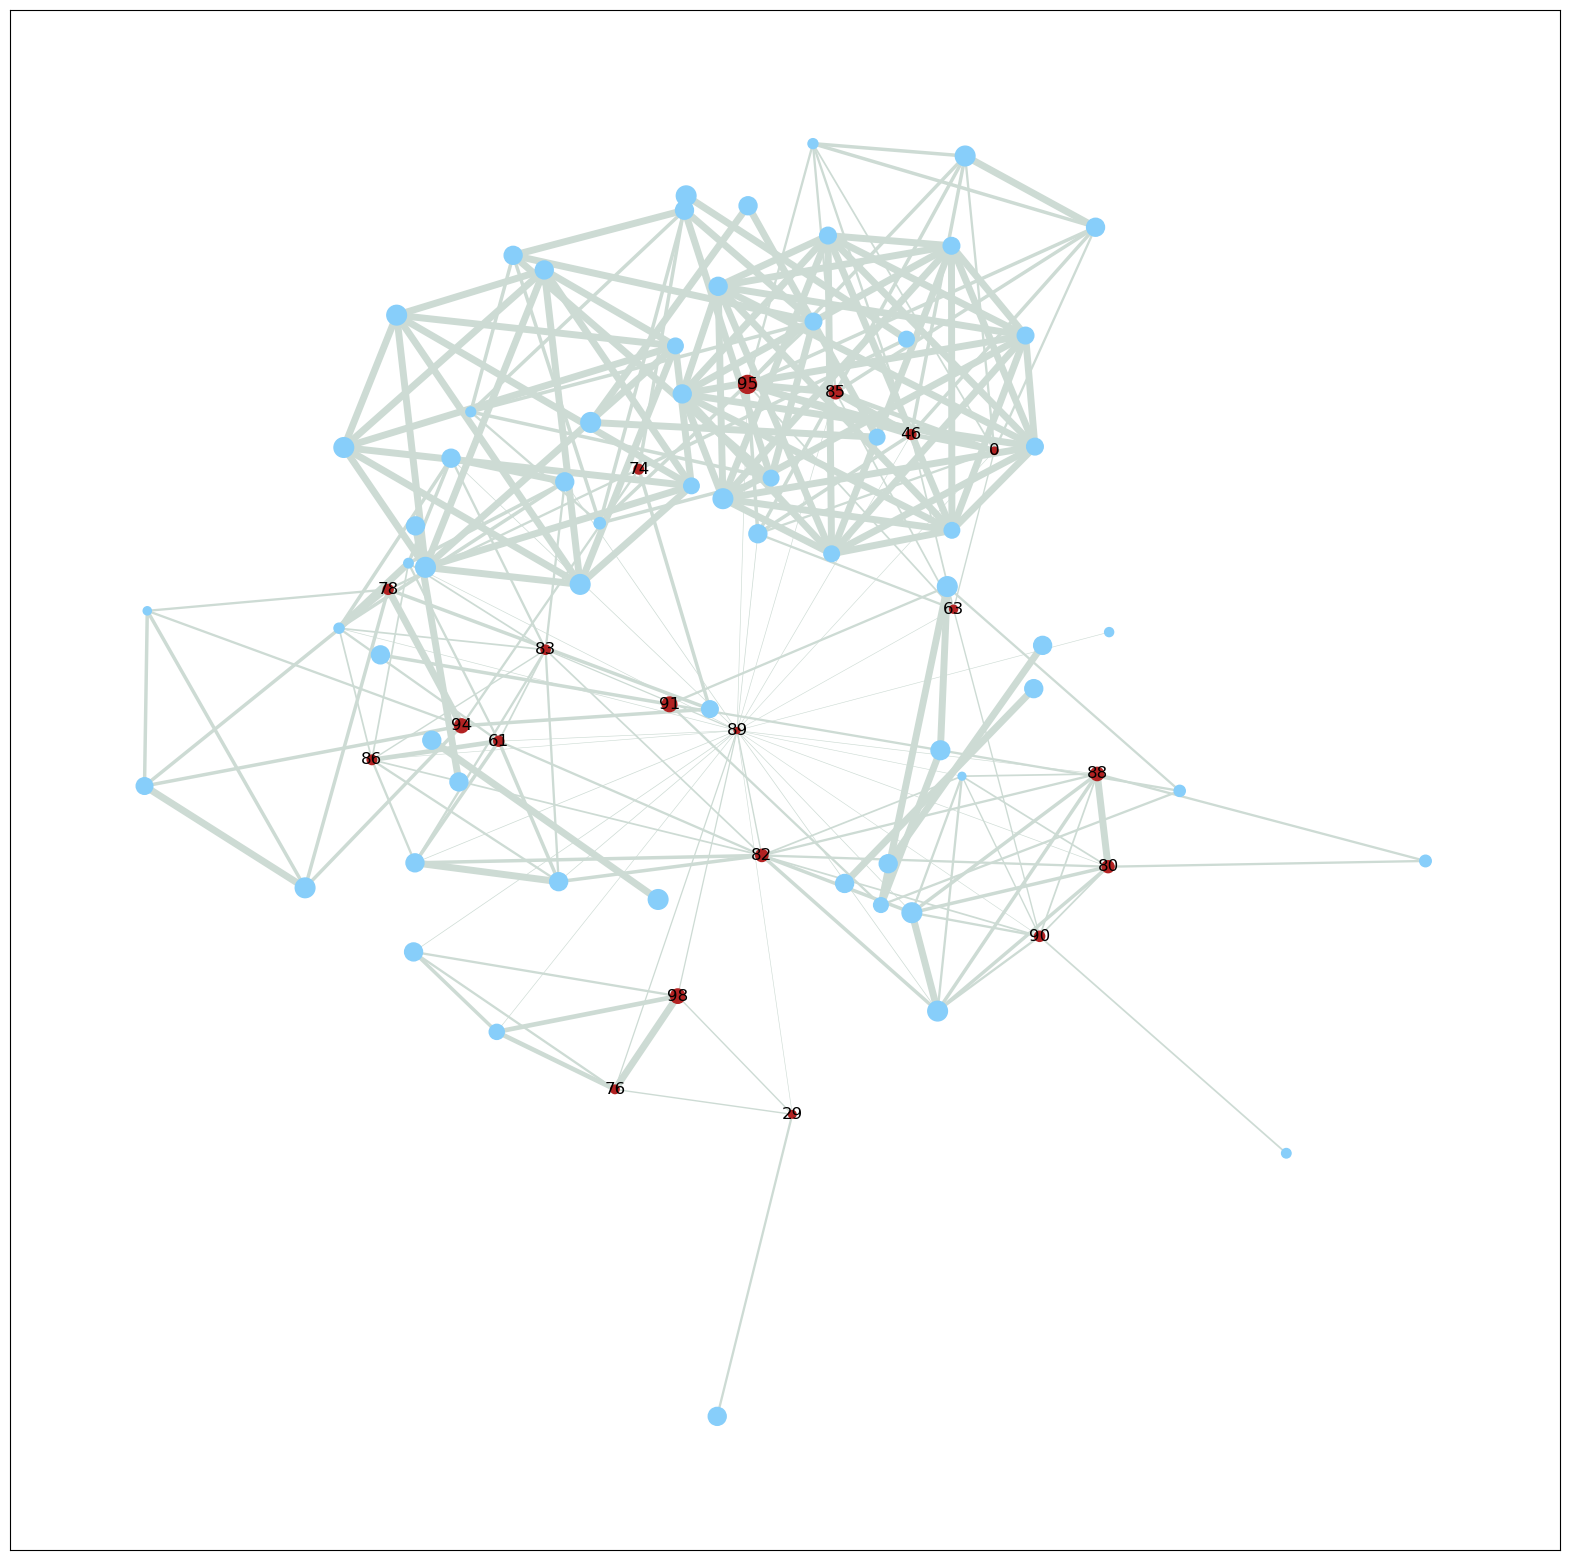

<Figure size 640x480 with 0 Axes>

+----+------------------------------------------------------------------------------------------------------+---------------+-----------+-----------------------------------------------------------+
|    | Term                                                                                                 |   Betweenness | Up/Down   | Genes                                                     |
|----+------------------------------------------------------------------------------------------------------+---------------+-----------+-----------------------------------------------------------|
| 89 | Neuron Projection (GO:0043005)                                                                       |   0.121148    | ↓         | C4A;GABRB1;RTN1;KCNE3;KCNC2;AVIL;CAMK2A;MCHR1;STX1A;HDAC6 |
| 90 | Hydrolase Activity, Acting On Carbon-Nitrogen (But Not Peptide) Bonds, In Linear Amides (GO:0016811) |   0.0109907   | ↓         | PM20D2;GLS2;HDAC6                                         |
| 29 | Pro

In [46]:
betweenness_centrality(significant_pathways, [3])

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


63 Metal Ion Transport (GO:0030001)
205 Heart Morphogenesis (GO:0003007)
253 Dilated cardiomyopathy (DCM)
258 Hypertrophic cardiomyopathy (HCM)
263 Intracellular Monoatomic Cation Homeostasis (GO:0030003)
57 Regulation Of Cell Migration (GO:0030334)
207 Regulation Of ERK1 And ERK2 Cascade (GO:0070372)
211 Positive Regulation Of Gene Expression (GO:0010628)
237 Positive Regulation Of Macromolecule Metabolic Process (GO:0010604)
260 Positive Regulation Of Signal Transduction (GO:0009967)
266 AMPK signaling pathway
282 Muscle Organ Development (GO:0007517)
295 Inflammatory Response (GO:0006954)
301 Collagen-Containing Extracellular Matrix (GO:0062023)
185 Endocytosis (GO:0006897)
292 Negative Regulation Of Signal Transduction (GO:0009968)
135 Positive Regulation Of Multicellular Organismal Process (GO:0051240)
255 Glucose Homeostasis (GO:0042593)
285 Regulation Of Cold-Induced Thermogenesis (GO:0120161)
190 Fatty Acid Biosynthetic Process (GO:0006633)


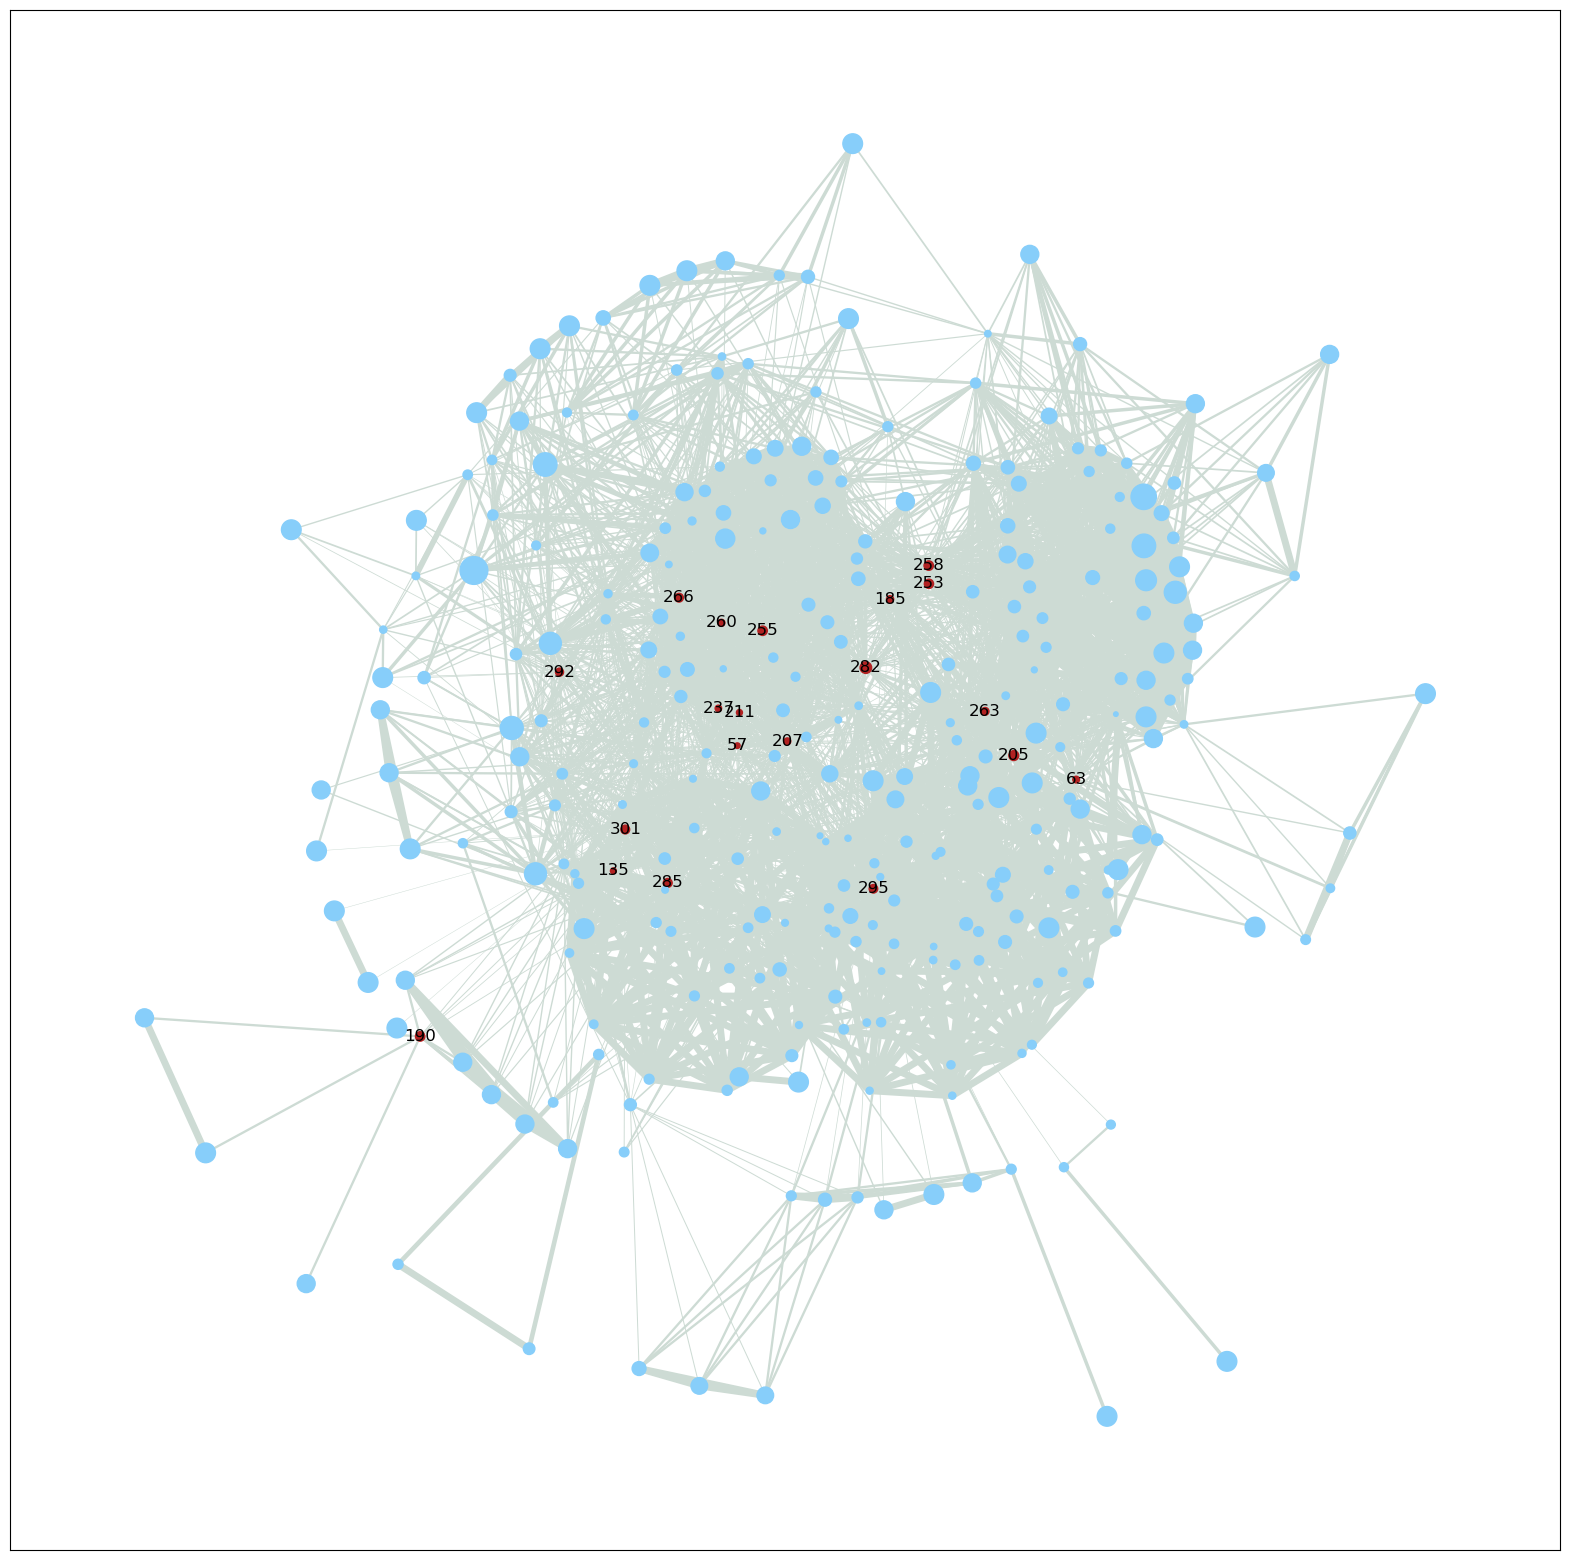

<Figure size 640x480 with 0 Axes>

+-----+----------------------------------------------------------------------+---------------+-----------+-----------------------------------------------------------------------------------------+
|     | Term                                                                 |   Betweenness | Up/Down   | Genes                                                                                   |
|-----+----------------------------------------------------------------------+---------------+-----------+-----------------------------------------------------------------------------------------|
| 295 | Inflammatory Response (GO:0006954)                                   |     0.0565711 | ↓         | AOC3;CCL24;PLA2G2D;ORM1;CCL8;PTGER3;ADORA1;FOLR2;PF4                                    |
| 301 | Collagen-Containing Extracellular Matrix (GO:0062023)                |     0.0422161 | ↓         | C1QB;ORM1;LUM;CMA1;COL14A1;SERPINF1;ADIPOQ;FBLN2;ASPN;SMOC2;CCDC80;CILP;HMCN2;PF4;MATN2 |
| 260 | Positiv

In [47]:
betweenness_centrality(significant_pathways, [4])

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


91 Neuron Projection Morphogenesis (GO:0048812)
119 Regulation Of Neuron Differentiation (GO:0045664)
1 Negative Regulation Of Binding (GO:0051100)
48 Negative Regulation Of Protein Binding (GO:0032091)
123 Regulation Of Cardiac Muscle Cell Differentiation (GO:2000725)
110 Regulation Of Mitotic Cell Cycle (GO:0007346)
4 Positive Regulation Of Programmed Cell Death (GO:0043068)
23 Protein Heterodimerization Activity (GO:0046982)
26 Cell Morphogenesis Involved In Neuron Differentiation (GO:0048667)
50 Regulation Of Heart Contraction (GO:0008016)
11 Negative Regulation Of Cell Cycle (GO:0045786)


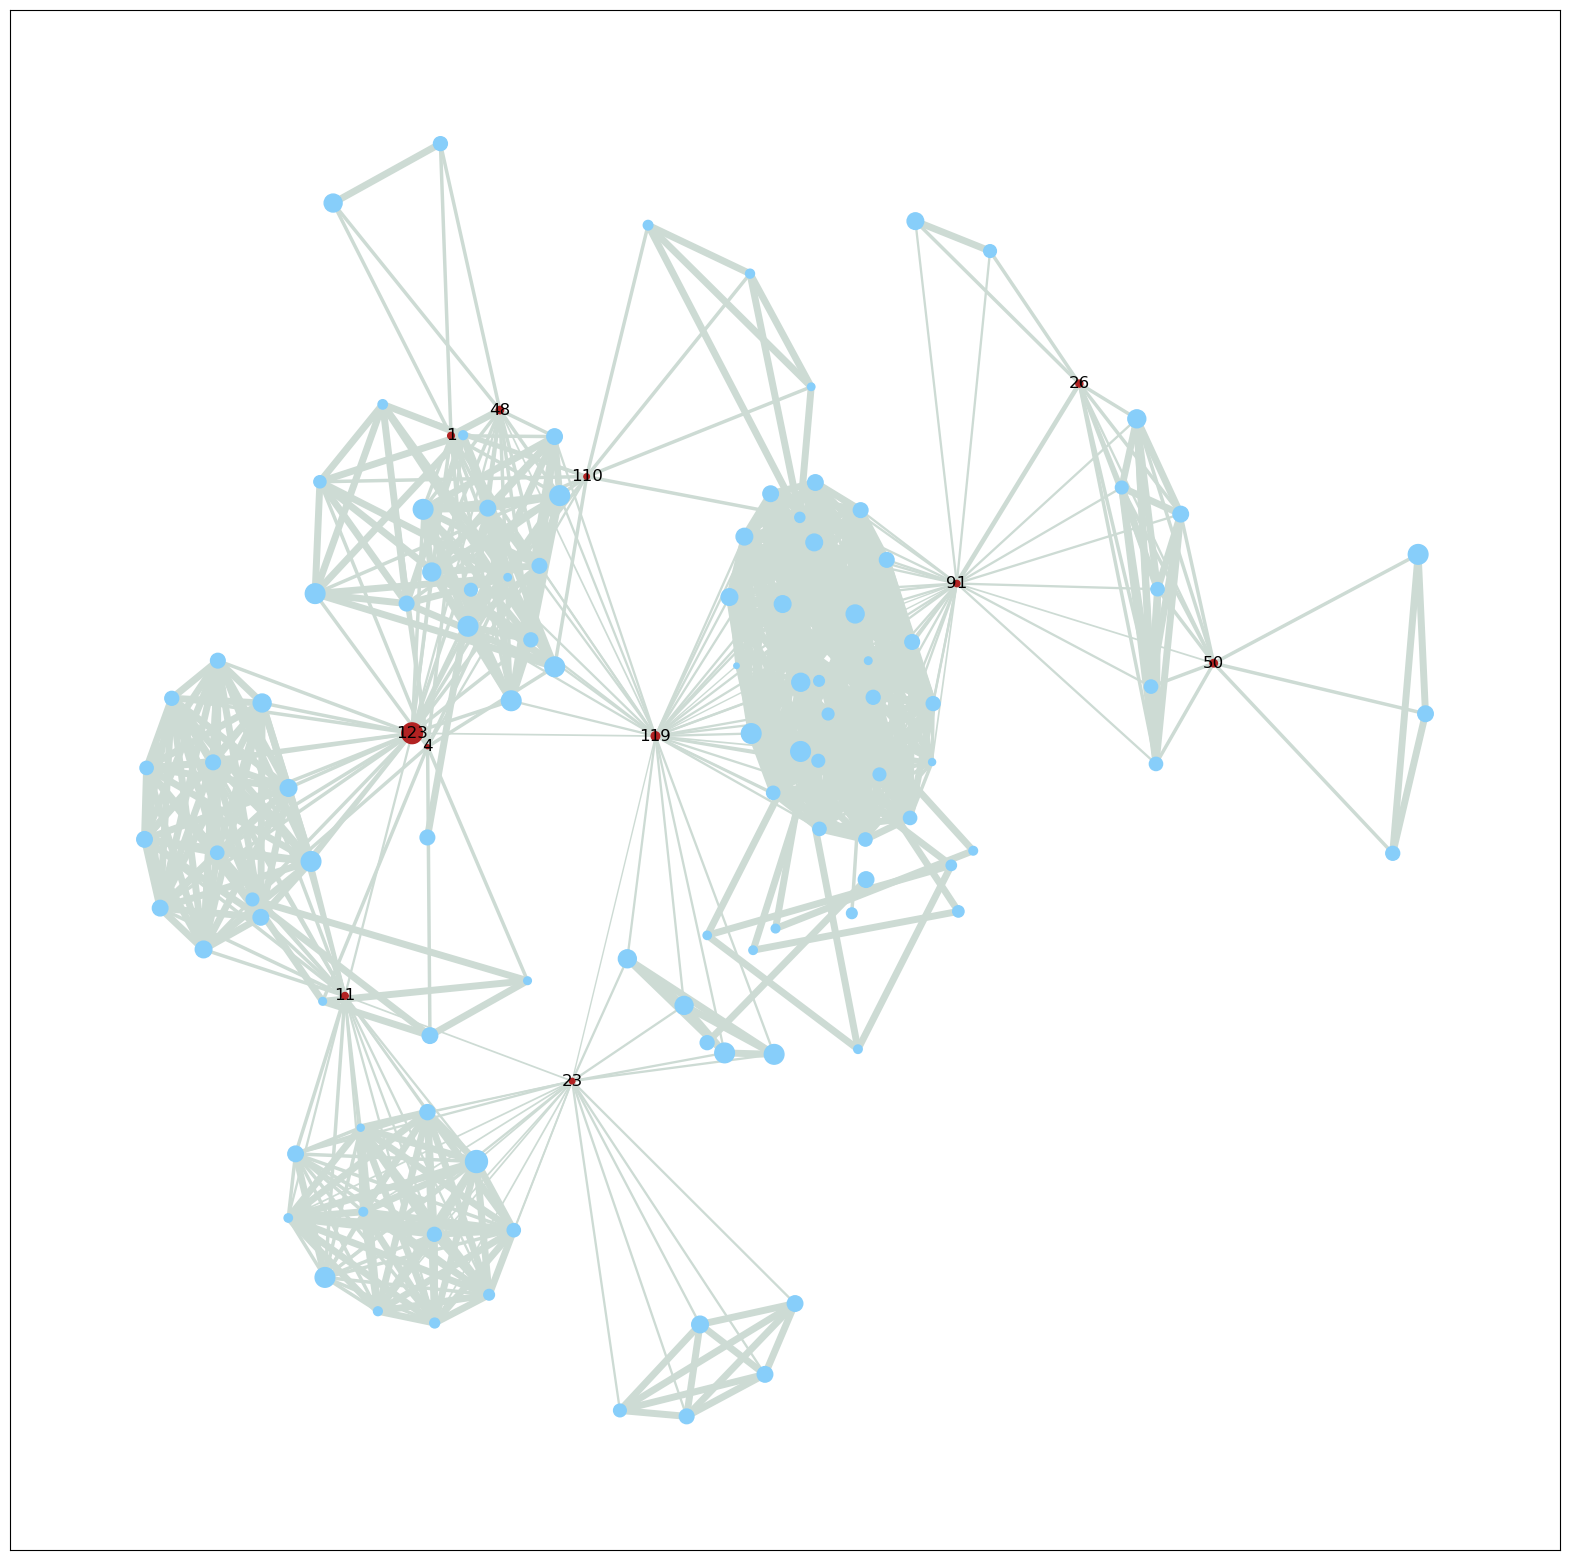

<Figure size 640x480 with 0 Axes>

+-----+--------------------------------------------------------------------+---------------+-----------+--------------------+
|     | Term                                                               |   Betweenness | Up/Down   | Genes              |
|-----+--------------------------------------------------------------------+---------------+-----------+--------------------|
| 119 | Regulation Of Neuron Differentiation (GO:0045664)                  |    0.290164   | ↑         | NLGN1;ADRA2C;DKK1  |
|  23 | Protein Heterodimerization Activity (GO:0046982)                   |    0.147255   | ↑         | TOP2A;NR4A1;ADRA2C |
|  91 | Neuron Projection Morphogenesis (GO:0048812)                       |    0.137042   | ↑         | SPTBN4;NLGN1;BRSK2 |
| 123 | Regulation Of Cardiac Muscle Cell Differentiation (GO:2000725)     |    0.106258   | ↑         | MYOCD;DKK1         |
|  11 | Negative Regulation Of Cell Cycle (GO:0045786)                     |    0.0482399  | ↑         | NR4A1;MYOCD  

In [48]:
betweenness_centrality(significant_pathways, [5])

95 Negative Regulation Of Mitotic Metaphase/Anaphase Transition (GO:0045841)
97 Mitotic Spindle Checkpoint Signaling (GO:0071174)
98 Mitotic Spindle Assembly Checkpoint Signaling (GO:0007094)
99 Spindle Assembly Checkpoint Signaling (GO:0071173)
86 Pattern Recognition Receptor Signaling Pathway (GO:0002221)
87 Regulation Of Acute Inflammatory Response (GO:0002673)
79 O-acyltransferase Activity (GO:0008374)
78 Regulation Of Axonogenesis (GO:0050770)
25 Inorganic Anion Transport (GO:0015698)
92 Starch and sucrose metabolism
82 Galactose metabolism
91 Regulation Of Microglial Cell Activation (GO:1903978)


/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


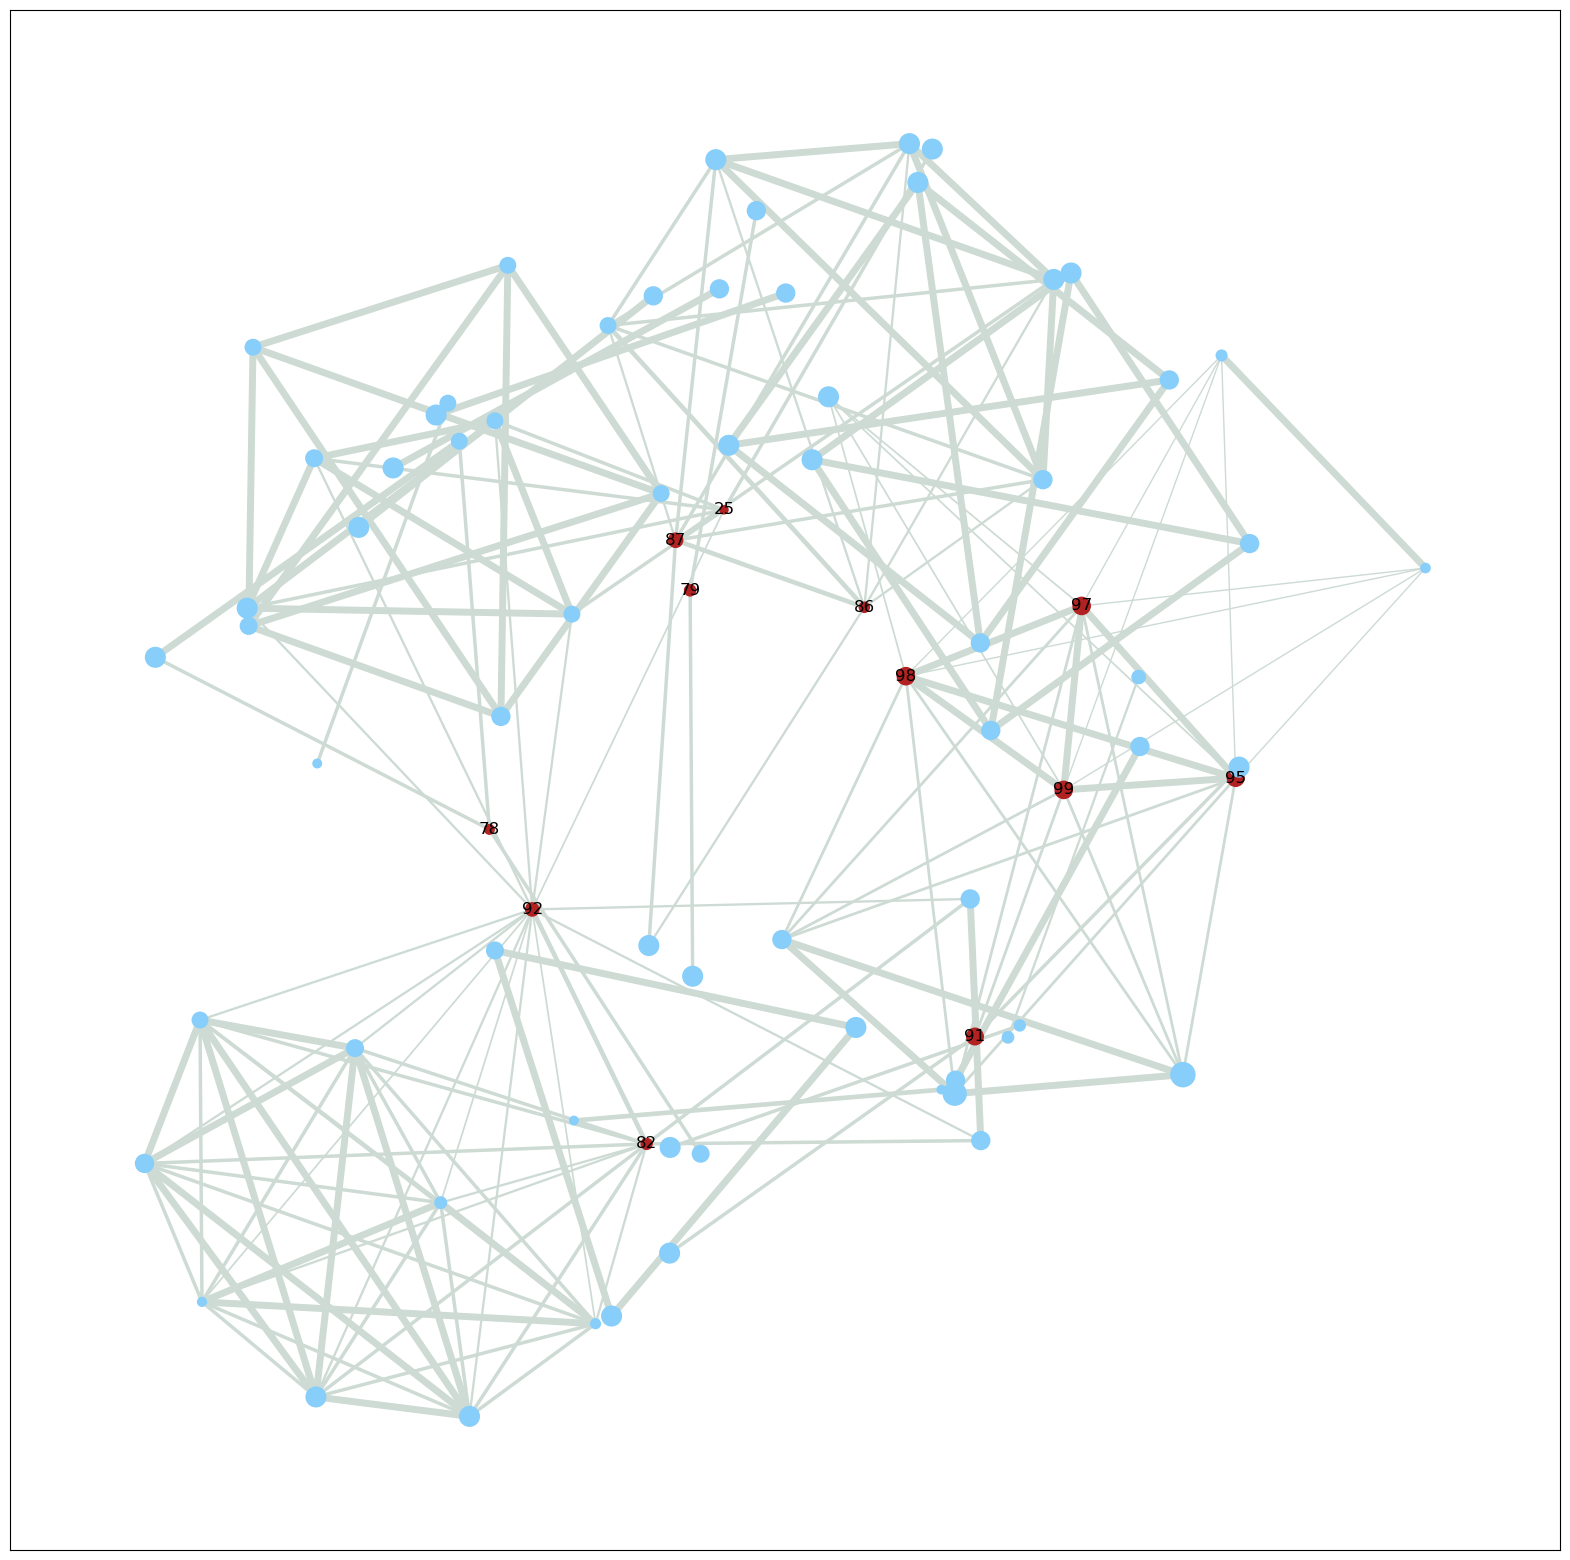

<Figure size 640x480 with 0 Axes>

+----+---------------------------------------------------------------------------+---------------+-----------+-----------------------+
|    | Term                                                                      |   Betweenness | Up/Down   | Genes                 |
|----+---------------------------------------------------------------------------+---------------+-----------+-----------------------|
| 92 | Starch and sucrose metabolism                                             |   0.0252905   | ↓         | MGAM;ENPP3;GCK        |
| 25 | Inorganic Anion Transport (GO:0015698)                                    |   0.00546822  | ↓         | SLC5A8;ENPP3          |
| 82 | Galactose metabolism                                                      |   0.00273411  | ↓         | MGAM;GCK              |
| 95 | Negative Regulation Of Mitotic Metaphase/Anaphase Transition (GO:0045841) |   0.00093985  | ↑         | ZWILCH;TTK;BUB1;NDC80 |
| 97 | Mitotic Spindle Checkpoint Signaling (GO:0071174

In [49]:
betweenness_centrality(significant_pathways, [6])

/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(
/Users/anhnguyen/miniconda3/envs/st_project/lib/python3.12/site-packages/gseapy/plot.py:694: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[self.colname].replace(


10 Regulation Of Mitotic Nuclear Division (GO:0007088)
11 ERK1 And ERK2 Cascade (GO:0070371)
16 Positive Regulation Of Protein Kinase B Signaling (GO:0051897)
21 Regulation Of Epithelial Cell Proliferation (GO:0050678)
22 Positive Regulation Of Cytokine Production (GO:0001819)
30 Positive Regulation Of Transcription Regulatory Region DNA Binding (GO:2000679)
55 Regulation Of MAPK Cascade (GO:0043408)
95 Positive Regulation Of T Cell Proliferation (GO:0042102)
100 Regulation Of Protein Kinase B Signaling (GO:0051896)
125 Regulation Of Transcription Regulatory Region DNA Binding (GO:2000677)
139 Primary Alcohol Metabolic Process (GO:0034308)
140 Inflammatory Response (GO:0006954)
51 Negative Regulation Of Cell Differentiation (GO:0045596)
35 Regulation Of Mitotic Cell Cycle (GO:0007346)
54 Response To Type II Interferon (GO:0034341)
82 Myeloid Leukocyte Differentiation (GO:0002573)
115 Neuron Migration (GO:0001764)
106 Epithelial Cell Differentiation (GO:0030855)
126 Plasma Membrane Boun

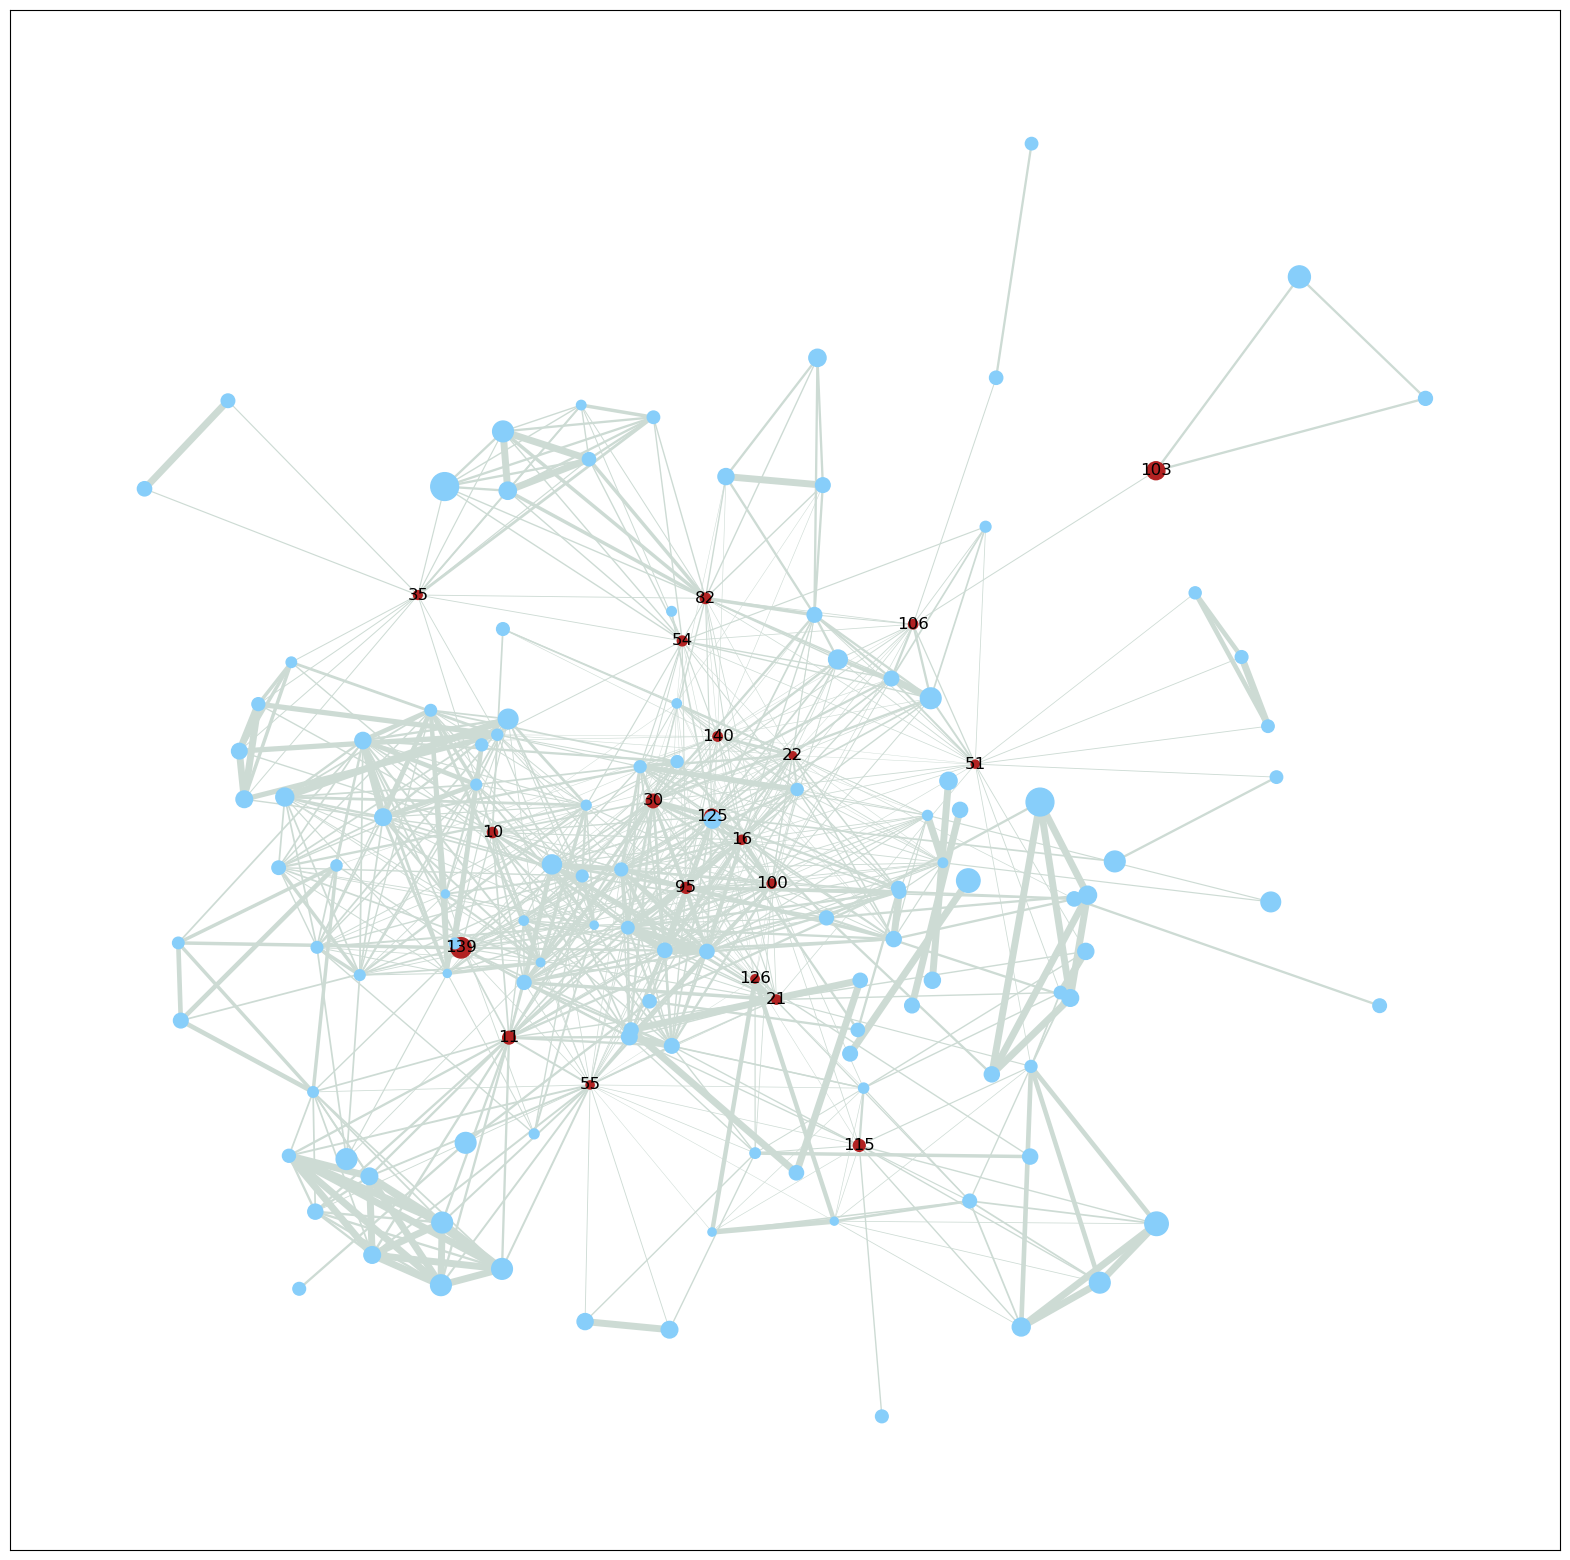

<Figure size 640x480 with 0 Axes>

+-----+---------------------------------------------------------------------------------+---------------+-----------+-------------------------------------------------------------------+
|     | Term                                                                            |   Betweenness | Up/Down   | Genes                                                             |
|-----+---------------------------------------------------------------------------------+---------------+-----------+-------------------------------------------------------------------|
|  55 | Regulation Of MAPK Cascade (GO:0043408)                                         |     0.0696519 | ↑         | DUSP5;NTRK2;EPHA7;DUSP2;IGF1;WDR54;RNF41                          |
|  51 | Negative Regulation Of Cell Differentiation (GO:0045596)                        |     0.0563833 | ↑         | ANKRD26;METTL14;SFRP2;CITED1;CHADL;LEO1;GATA3                     |
| 106 | Epithelial Cell Differentiation (GO:0030855)                  

In [50]:
betweenness_centrality(significant_pathways, [7])